# Plant function vs microbial community composition

Test plant funciotnal variables on microbial community composition using constrained analysis of principle components

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#library(Hmisc)
library(lme4)
# library(lmerTest)
library(ggplot2)
library(dplyr)
library(tidyr)
#library(pbkrtest)
library(gridExtra)
library(reshape2)
# library(picante)
#library(ape)
library(DESeq2)
library(phyloseq)
library(doParallel)



/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘tidyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarnin

In [3]:
%%R

#log2foldFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/bare-plant.csv'
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')

physeq.Full = readRDS(F)


phy = filter_taxa(physeq.Full, function(x) sum(x > 0) > 0, TRUE)

phy = subset_samples(phy, Plant != "BARE")
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


# Overall Dataset

## CAP analysis

## Create distance matrix

In [4]:
%%R
phy = subset_samples(physeq.Full, Plant != "BARE" & Treatment == "Nneg")
phy = subset_samples(phy, Type != "Maize" | Plant == "B73")



registerDoParallel(cores=28)
wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [5]:
%%R
sample_data(phy) %>% 
    select(A_Resid_logN)

Sample Data:        [47 samples by 1 sample variables]:
                  A_Resid_logN
sample4-2.02_Nneg  -0.19050468
sample4-4.21_Nneg  -0.17856882
sample1-2.23_Nneg   0.15713503
sample6-2.26_Nneg  -0.88291804
sample6-3.18_Nneg  -0.45104522
sample2-2.08_Nneg   0.67765731
sample3-2.03_Nneg  -0.44954409
sample1-4.24_Nneg   0.34147523
sample4-1.03_Nneg   0.59699601
sample5-3.11_Nneg  -0.95981056
sample3-3.06_Nneg  -0.42889379
sample2-3.05_Nneg   0.14683682
sample5-4.06_Nneg  -1.01763316
sample5-2.18_Nneg  -0.41928415
sample3-4.15_Nneg  -0.08861040
sample6-4.30_Nneg  -0.75969768
sample6-1.12_Nneg  -0.22950294
sample2-1.08_Nneg   0.57341718
sample1-1.27_Nneg   0.42539899
sample4-3.10_Nneg  -0.59762227
sample5-1.29_Nneg  -0.61182794
sample1-3.08_Nneg   0.37465756
sample3-1.09_Nneg  -0.62158577
sample2-4.25_Nneg   0.11184152
sample8-2.07_Nneg   0.35805309
sample7-4.02_Nneg  -0.45658860
sample7-3.19_Nneg  -0.18147375
sample3-4.18_Nneg   0.18174987
sample7-2.12_Nneg   0.05507493
sample7-2.28_N

## Add seed size information

In [6]:
%%R
#add seed size
Plant = c("ERATE", "HELAN", "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")
SeedSize_mg = c(.0035, 90, 333, 38, .49, 10.7, 32.39,
               3.2, 1.58, 9.6, 1.8, 174, .264, .224, 0.219, 0.279, 0.207,
               0.240, 0.0869, 0.222, 0.228, 0.231)
SS = cbind(Plant, SeedSize_mg) %>% as.data.frame
head(SS) %>% print
SS$SeedSize_mg = SS$SeedSize_mg %>% as.character %>% as.numeric



# # PCA of annuals
sd = as(sample_data(phy), "data.frame")
sd$Plant %>% levels %>% print
sd = left_join(sd, SS, by = "Plant")

rownames(sd) = sd$X.sample

#sample_data(phy) = sd 

# fit = prcomp(~log(SeedSize_mg) + A_Resid_logN + A_Resid_logCN + DAP, data = sd, 
#                  na.action = na.exclude, center = TRUE, scale = TRUE)


# summary(fit) %>% print
# fit$rotation %>% print
# biplot(fit)

#S = predict(fit)[,1:3]
#TM_Fit = sd

sample_data(phy) = sd

dim(sd)

# p = ggplot(TM_Fit, aes(PC1, PC2, colour = Plant, 
#                        size = 12), pch = 21)
# p = p + geom_point()
# p = p + scale_colour_brewer(palette="Paired")
# p = p + ggtitle("PCA of Late Season Plants: Seed size and residuals of Biomass, N uptake, C:N ratio")
# p

   Plant SeedSize_mg
1  ERATE      0.0035
2  HELAN          90
3    B73         333
4  FAGES          38
5  AMAPO        0.49
6 SORSUD        10.7
 [1] "ABUTH"  "AMAPO"  "B73"    "ECHCG"  "ELCOR"  "ERATE"  "FAGES"  "GLYMA" 
 [9] "HELAN"  "SETFA"  "SORBI"  "SORSUD"
[1] 47 56


In [7]:
%%R
sample_data(phy) %>% 
   head

Sample Data:        [6 samples by 56 sample variables]:
                           X.sample Library Primer_Plate Primer_Well_ID
sample4-2.02_Nneg sample4-2.02_Nneg       1            1             C3
sample4-4.21_Nneg sample4-4.21_Nneg       1            1             G3
sample1-2.23_Nneg sample1-2.23_Nneg       1            1             C1
sample6-2.26_Nneg sample6-2.26_Nneg       1            2             C7
sample6-3.18_Nneg sample6-3.18_Nneg       1            2             E7
sample2-2.08_Nneg sample2-2.08_Nneg       1            1             C7
                  primerFR_ID_byPlate primerFR_ID_total barcode_ID    PlotID
sample4-2.02_Nneg                  19                19         19 2.02_Nneg
sample4-4.21_Nneg                  23                23         23 4.21_Nneg
sample1-2.23_Nneg                   3                 3          3 2.23_Nneg
sample6-2.26_Nneg                  51               147        147 2.26_Nneg
sample6-3.18_Nneg                  53               149

In [8]:
%%R
theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
}


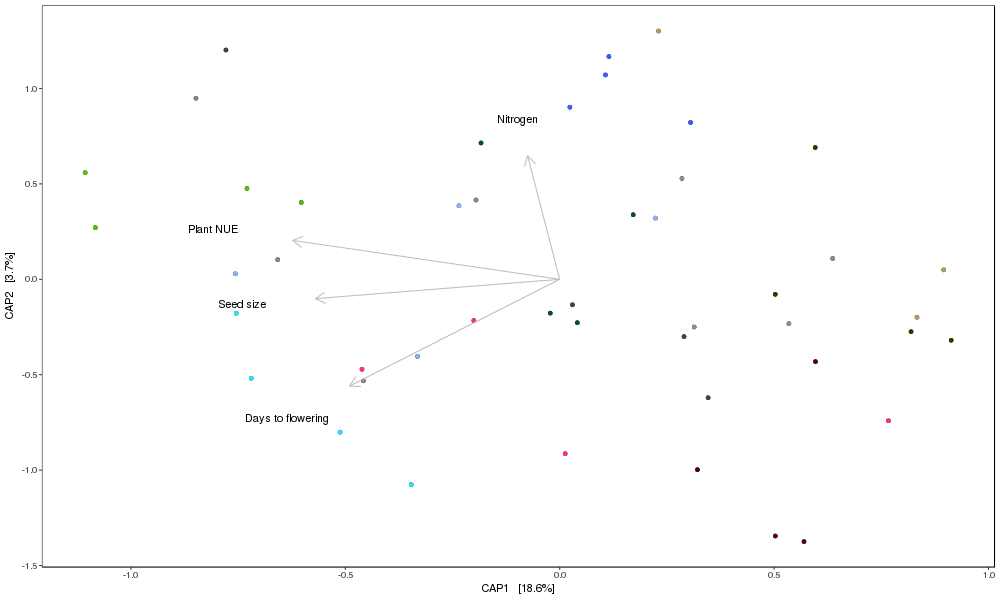

In [12]:
%%R -w 1000 -h 600
sample_data(phy)$Plant = factor(sample_data(phy)$Plant, levels = c("B73", "ECHCG", "SETFA", "SORBI", "SORSUD", 
                                                                      "ELCOR", "ERATE",
                                                                      "ABUTH", "HELAN", "FAGES", "AMAPO", "GLYMA"))

sample_data(phy)$DAP = sample_data(phy)$DAP %>% as.character() %>% as.numeric()

cap.ord = ordinate(
    physeq = phy, 
    method = "CAP",
    distance = wunif.dist,
    #formula = ~ PC1 + PC2 + PC3 + Condition(Library)
    formula = ~ log(SeedSize_mg) + A_Resid_logN + A_Resid_logCN  + DAP  + Condition(Library))
    #formula = ~ BX_activity_g + CB_activity_g + LAP_activity_g + NAG_activity_g + Condition(Library))

# CAP ordinate


# CAP plot
cap.plot <- plot_ordination(phy, cap.ord, axes = c(1,2)) + 
    geom_point(aes(colour = Plant), alpha= 1) + 
    #geom_point(colour = "grey90", 
    #    size = 1.5) + 
    
    scale_color_manual(values = c("#1CE6FF","#B79762", "#004D43", "#8FB0FF", "#997D87", "#5A0007", "#809693", 
                                  "#1B4400", "#4FC601",  "#3B5DFF", "#4A3B53", "#FF2F80"),
                       name = "Genotype",
                       labels = c("Maize-B73", "Echinichloa crus-galli", 
                                  "Setaria faberi", "Sorghum bicolor", "S. bicolor \n subsp. sudanese", 
                                   "Eleusine coracana", "Eragrostis tef", "Abutilon theophrasti", 
                                  "Helianthus annuus",  "Fagopyrum esculentum", "Amaranthus powellii", "Glycine max")) 




# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap.ord, display = "bp")

rownames(arrowmat) = c("Seed size", "Nitrogen", "Plant NUE", "Days to flowering")
#rownames(arrowmat) = c("BX", "CB", "LAP", "NAG")

# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
p = cap.plot + 
geom_segment(arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
    ) + 
geom_text(label_map,   
    data = arrowdf, 
    show_guide = FALSE) 
p = p + theme_pub() 
#p = p + theme(panel.border = element_blank(), legend.position = "right", legend.text = element_text(size = 10)) 
p = p + theme(legend.position = "left", legend.text = element_text()) 

#save legend for independent formatting
g_legend<-function(a.gplot){
    tmp <- ggplot_gtable(ggplot_build(a.gplot))
    leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
    legend <- tmp$grobs[[leg]]
    legend
}


                        
legend1 <- g_legend(p)

                     
# p =  p + theme(axis.line.x = element_line(color="black", size = 1),
#     axis.line.y = element_line(color="black", size = 1), legend.position = "left")
p = p + theme(legend.position = "none")
p

In [13]:
%%R
anova(cap.ord)

Permutation test for capscale under reduced model
Permutation: free
Number of permutations: 999

Model: capscale(formula = distance ~ log(SeedSize_mg) + A_Resid_logN + A_Resid_logCN + DAP + Condition(Library), data = data)
         Df SumOfSqs      F Pr(>F)    
Model     4  0.41807 3.6544  0.001 ***
Residual 41  1.17265                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [14]:
%%R
# Check that rownames match
row.names(cap.plot$data)[1:5] %>% print
sample_data(phy) %>% row.names() %>% .[1:5]

[1] "sample4-2.02_Nneg" "sample4-4.21_Nneg" "sample1-2.23_Nneg"
[4] "sample6-2.26_Nneg" "sample6-3.18_Nneg"
[1] "sample4-2.02_Nneg" "sample4-4.21_Nneg" "sample1-2.23_Nneg"
[4] "sample6-2.26_Nneg" "sample6-3.18_Nneg"


In [15]:
%%R
sample_data(phy)$CAP1 = cap.plot$data$CAP1
sample_data(phy)$CAP2 = cap.plot$data$CAP2
#head(sample_data(phy))

## DESEQ of CAP1 - all plants

In [17]:
%%R
dds = phyloseq_to_deseq2(phy, ~Library + CAP1)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

DF$Test = "CAP1"
        CAP1 = DF

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: converting counts to integer mode

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: the design formula contains a numeric variable with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: estimating size factors

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: estimating dispersions

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: gene-wise dispersion estimates: 38 workers

  warning

[1] "Intercept" "Library"   "CAP1"     


In [18]:
%%R
df.sig = DF[DF$padj < .05,]
levels(df.sig) = rev(levels(df.sig))
df.ns = DF[DF$padj >= .05,]

Plist = unique(df.sig$Rank2) %>% print
temp = filter(DF, Rank2 %in% Plist)
temp = filter(temp, !is.na(Rank2) & Rank2 != "Candidate_division_BRC1" & Rank2 != "Elusimicrobia" & Rank2 != "Chlorobi" & Rank2 != "Cyanobacteria")
temp$Rank2 = droplevels(temp$Rank2)
levels(temp$Rank2) %>% unique()

 [1] <NA>                   Chloroflexi            Acidobacteria         
 [4] Gemmatimonadetes       Verrucomicrobia        Proteobacteria        
 [7] Bacteroidetes          Candidate_division_WS3 Actinobacteria        
[10] Nitrospirae            Planctomycetes        
30 Levels: Acidobacteria Actinobacteria Armatimonadetes ... WCHB1-60
 [1] "Acidobacteria"          "Actinobacteria"         "Bacteroidetes"         
 [4] "Candidate_division_WS3" "Chloroflexi"            "Gemmatimonadetes"      
 [7] "Nitrospirae"            "Planctomycetes"         "Proteobacteria"        
[10] "Verrucomicrobia"       


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Ignoring unknown aesthetics: position

  warnings.warn(x, RRuntimeWarning)


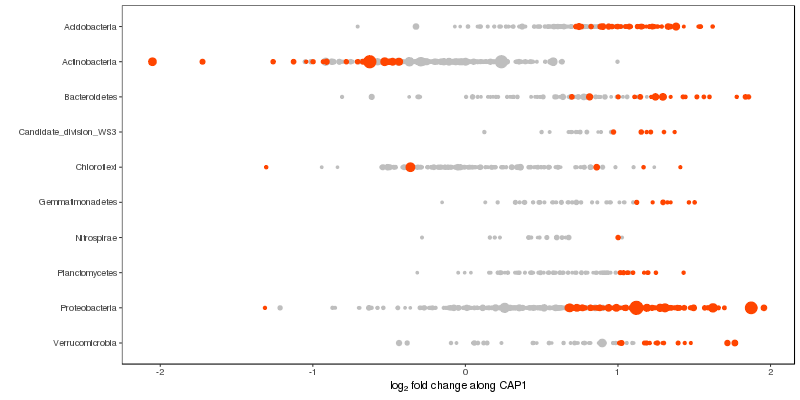

In [19]:
%%R -w 800 -h 400



p1 = ggplot(temp)+
    geom_point(data = df.ns, aes(log2FoldChange, Rank2, size = baseMean/5000,  position = "jitter"), color = "Gray",) +
    scale_shape_identity() +
    geom_point(data = df.sig, aes(log2FoldChange, Rank2,  size = baseMean/5000, position = "jitter"),
               color = "orangered") +
    theme_pub() +
    scale_size("Relative abundance")+

    scale_y_discrete(limits = rev(levels(temp$Rank2))) +
    
    
               #geom_hline(y_intercept = .4) +
    
    #theme(axis.text.x = element_text(angle = 90)) +
    labs(x = expression(log[2]~fold~change~along~CAP1), parse = TRUE) +
    labs(y = "") + 
    theme(legend.position="left",  
          legend.text = element_text())
    #theme(panel.border = element_blank()) +
   
     #theme(axis.line.x = element_line(color="black", size = 1),
    #axis.line.y = element_blank())
           #axis.line.y = element_line(color="black", size = 1)) 



legend2 <- g_legend(p1)

                     

p1 = p1 + theme(legend.position = "none")
p1

In [20]:
%%R -w 708 -h 400

Fig = cowplot::plot_grid(p, p1,  ncol = 1, align = 'v', rel_heights = c(2, 1.5))
Legends = cowplot::plot_grid(legend1, legend2,  ncol = 1, align = 'v', rel_heights = c(2, 1.5))
Compiled = cowplot::plot_grid(Legends, Fig,  ncol = 2, rel_widths = c(2,8))

In [23]:
%%R
svg("/home/bryan/RhizCG/figures/ms_figures/CAP_DeSeq_plots.svg", width = 5.5, height = 4.5)
Fig %>% print
dev.off()

png 
  2 


In [22]:
%%R
svg("/home/bryan/RhizCG/figures/ms_figures/CAP_DeSeq_legends.svg", width = 2, height = 4.5)
Legends %>% print
dev.off()

png 
  2 


In [21]:
%%R
svg("/home/bryan/RhizCG/figures/ms_figures/CAP_DeSeq_compiled.svg", width = 8.08, height = 4.5)
Compiled %>% print
dev.off()

png 
  2 


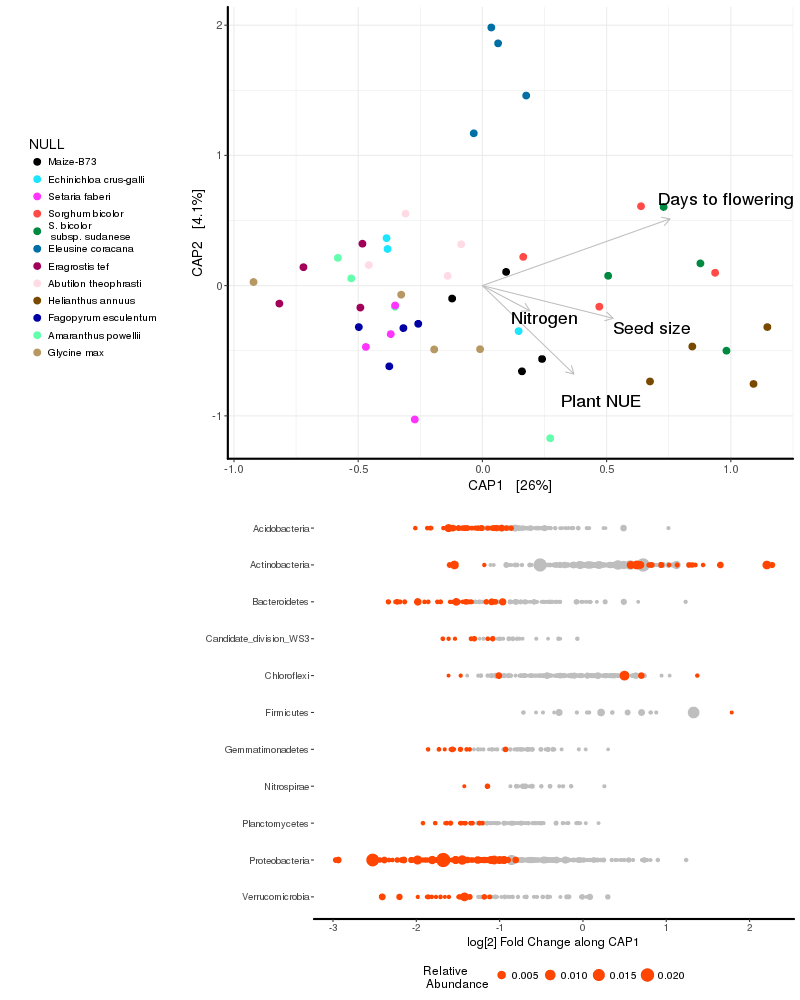

In [21]:
%%R -w 800 -h 1000
grid.arrange(p, p1, legend1, ncol = 2, layout_matrix = rbind(c(3,1), c(NA,2)), widths = c(1.2,4))

In [248]:
%%R
pdf('/home/bryan/RhizCG/figures/FunctionalFig_test.pdf', width = 7.5, height = 6.5)
grid.arrange(p, p1, legend1, ncol = 2, layout_matrix = rbind(c(3,1), c(NA,2)), 
             widths = c(1.3,4), heights = c(3,2))
dev.off()

png 
  2 


In [20]:
%%R
# # saving figure
# pdf(file = "/home/bryan/RhizCG/figures/ordinations/DeSEQofCAP1.pdf", 
#     height = 6, width = 15)
# p %>% print
# dev.off()

png 
  2 


In [249]:
%%R
CAP1.sig = CAP1 %>% filter(padj < 0.05 & log2FoldChange < 0)

In [246]:
%%R
CAP1.sig %>% select(OTU, baseMean, log2FoldChange, Rank2, Rank3, Rank4, Rank5, Rank6) %>%
    arrange(log2FoldChange)

         OTU   baseMean log2FoldChange          Rank2               Rank3
1      OTU.3  29.003350     -2.0511034 Actinobacteria    Streptomycetales
2    OTU.200   7.416459     -1.7229625 Actinobacteria       Micrococcales
3   OTU.2220   1.264673     -1.3137806 Proteobacteria Deltaproteobacteria
4    OTU.717   1.409121     -1.3054629    Chloroflexi              KD4-96
5   OTU.3910   4.733809     -1.2600785 Actinobacteria    Streptomycetales
6    OTU.343   5.846149     -1.1260461 Actinobacteria   Micromonosporales
7   OTU.3423   1.241088     -1.0434384 Actinobacteria       Micrococcales
8    OTU.647   2.071662     -1.0003850 Actinobacteria      Acidimicrobiia
9   OTU.3548   3.580021     -0.9971539 Actinobacteria    Streptomycetales
10  OTU.1259   3.161582     -0.9318361 Actinobacteria Propionibacteriales
11 OTU.10472   8.472608     -0.9095152 Actinobacteria   Micromonosporales
12  OTU.9421   4.973247     -0.7801109 Actinobacteria                <NA>
13   OTU.251   4.958746     -0.7068043

### Check counts on responders to see if they are phylogeny driven or truly reflection functional variation

In [67]:
%%R
CAP1 %>% filter(log2FoldChange > 1.5 & padj < 0.05| log2FoldChange < -1.8  & padj < 0.05)

    baseMean log2FoldChange     lfcSE      stat       pvalue         padj
1   3.935699      -1.847087 0.3021641 -6.112859 9.786161e-10 2.288004e-07
2   5.797125      -1.839990 0.3612666 -5.093165 3.521357e-07 3.430389e-05
3   3.388094      -1.825186 0.3934430 -4.639010 3.500829e-06 1.948795e-04
4  11.077015      -1.958603 0.3410166 -5.743425 9.278064e-09 1.689078e-06
5   5.856292      -1.907503 0.3813485 -5.001992 5.674080e-07 4.422000e-05
6  90.154470      -1.883347 0.2423733 -7.770438 7.821500e-15 9.143333e-12
7   4.425231      -1.852804 0.3597808 -5.149815 2.607439e-07 2.770996e-05
8   7.277030      -1.812496 0.4270825 -4.243900 2.196683e-05 6.940330e-04
9   7.416459       1.714407 0.3588845  4.777045 1.778901e-06 1.094492e-04
10 29.003350       2.018940 0.3914245  5.157930 2.496943e-07 2.770996e-05
      Rank1          Rank2               Rank3                 Rank4
1  Bacteria  Bacteroidetes    Sphingobacteriia    Sphingobacteriales
2  Bacteria  Bacteroidetes    Sphingobacteriia  

In [57]:
%%R
str(d)

'data.frame':	47 obs. of  2 variables:
 $ count: num  7.32 0.5 1.59 0.5 1.93 ...
 $ Plant: Factor w/ 12 levels "B73","ECHCG",..: 3 3 10 1 1 11 12 10 3 7 ...


In [54]:
%%R -w 900 -h 700
library("scales")
d = plotCounts(dds, gene= "OTU.3", intgroup=c("Plant"), returnData=TRUE)  
#d = arrange(d, "CAP1")
 p = ggplot(d, aes(x = Plant, y = count)) + 
 geom_point() +
ggtitle("OTU.3") +
scale_y_continuous(trans=log2_trans())

d = plotCounts(dds, gene= "OTU.200", intgroup=c("Plant"), returnData=TRUE)  
#d = arrange(d, "CAP1")
 p1 = ggplot(d, aes(x = Plant, y = count)) + 
 geom_point() +
ggtitle("OTU.200") +
scale_y_continuous(trans=log2_trans())

d = plotCounts(dds, gene= "OTU.4", intgroup=c("Plant"), returnData=TRUE)  
#d = arrange(d, "CAP1")
 p2 = ggplot(d, aes(x = Plant, y = count)) + 
 geom_point() +
ggtitle("OTU.4") +
scale_y_continuous(trans=log2_trans())

d = plotCounts(dds, gene= "OTU.7874", intgroup=c("Plant"), returnData=TRUE)  
#d = arrange(d, "CAP1")
 p3 = ggplot(d, aes(x = Plant, y = count)) + 
 geom_point() +
ggtitle("OTU.7874") +
scale_y_continuous(trans=log2_trans())
# d = NULL
# p 

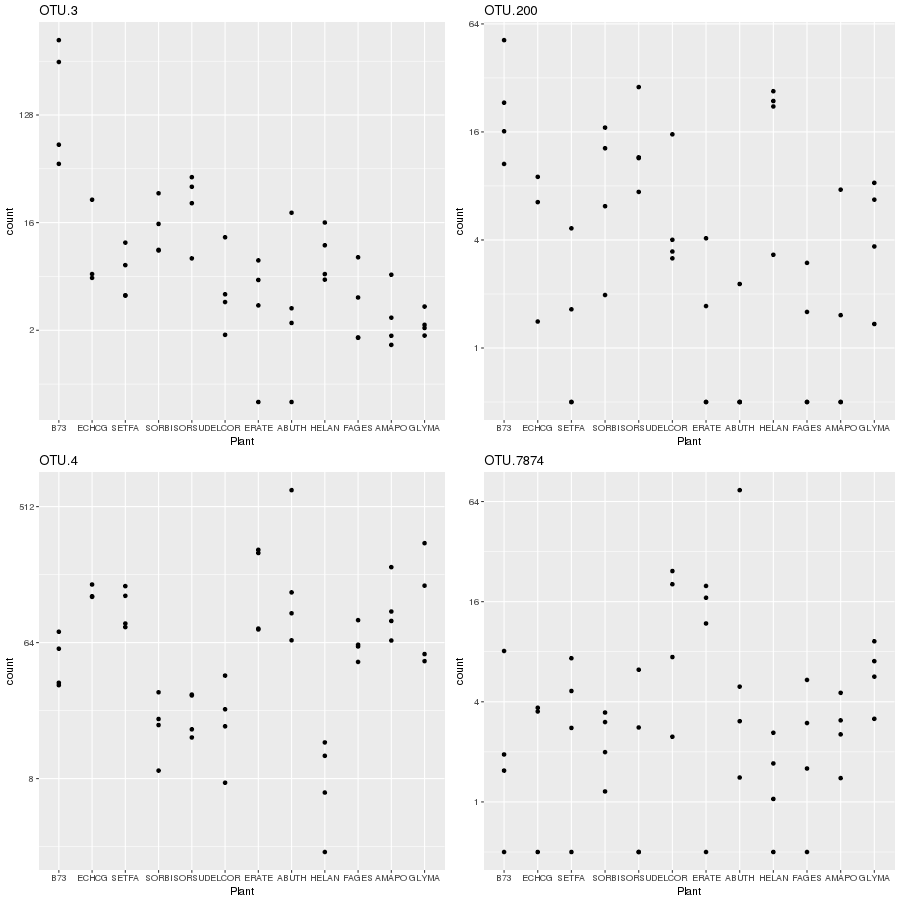

In [56]:
%%R -w 900 -h 900
grid.arrange(p,p1, p2, p3, ncol =2)

## DeSEQ of CAP2

In [40]:
%%R
dds = phyloseq_to_deseq2(phy, ~Library + CAP2)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF_2 = results(d_dds)

supp = tax_table(phy)
            if (!setequal(row.names(supp), row.names(DF_2))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF_2), row.names(supp)))
        }  

        DF_2 = data.frame(DF_2, supp)
        DF_2$OTU = rownames(DF_2)
DF_2$Test = "CAP2"
CAP2 = DF_2

[1] "Intercept" "Library"   "CAP2"     


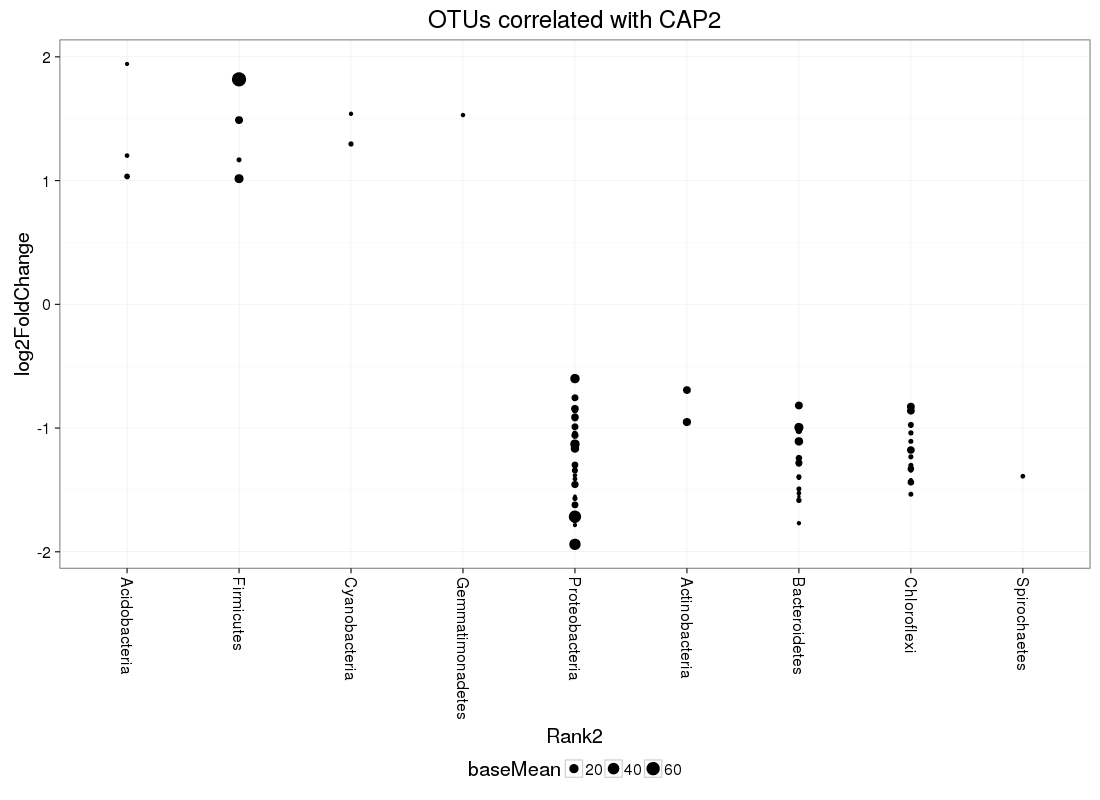

In [42]:
%%R -w 1100 -h 800
sigtab = DF_2 %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
# x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
# x = sort(x, TRUE)
# sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank2, y=log2FoldChange, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("OTUs correlated with CAP2")  +
   theme(legend.position="bottom")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2

In [43]:
%%R
DF_2.sig = DF_2[DF_2$padj < .05,]
levels(DF_2.sig) = rev(levels(DF_2.sig))
DF_2.ns = DF_2[DF_2$padj >= .05,]

Plist = unique(DF_2.sig$Rank2) %>% print
temp = filter(DF_2, Rank2 %in% Plist)
temp = filter(temp, !is.na(Rank2) & Rank2 != "Candidate_division_BRC1" & Rank2 != "Elusimicrobia" & Rank2 != "Chlorobi" & Rank2 != "Cyanobacteria")
temp$Rank2 = droplevels(temp$Rank2)
levels(temp$Rank2) %>% unique()

 [1] <NA>             Chloroflexi      Acidobacteria    Firmicutes      
 [5] Gemmatimonadetes Spirochaetes     Bacteroidetes    Cyanobacteria   
 [9] Proteobacteria   Actinobacteria  
30 Levels: Acidobacteria Actinobacteria Armatimonadetes ... WCHB1-60
[1] "Acidobacteria"    "Actinobacteria"   "Bacteroidetes"    "Chloroflexi"     
[5] "Firmicutes"       "Gemmatimonadetes" "Proteobacteria"   "Spirochaetes"    


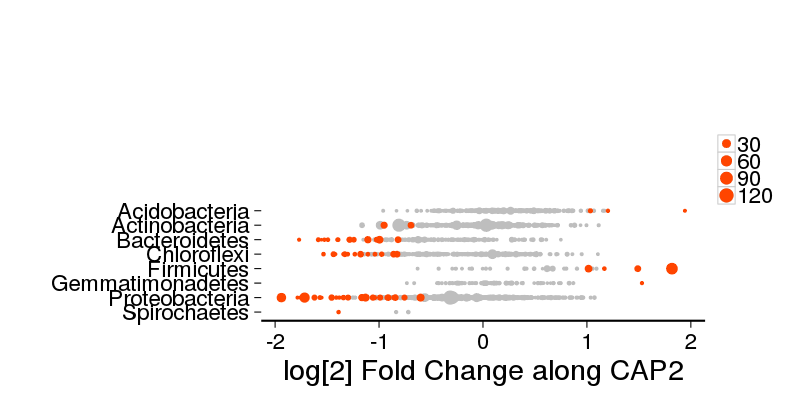

In [44]:
%%R -w 800 -h 400



p = ggplot(temp)+
    geom_point(data = DF_2.ns, aes(log2FoldChange, Rank2, size = baseMean,  position = "jitter"), color = "Gray",) +
    scale_shape_identity() +
    geom_point(data = DF_2.sig, aes(log2FoldChange, Rank2,  size = baseMean, position = "jitter"),
               color = "orangered") +
    theme_bw(base_size = 28) +

    scale_y_discrete(limits = rev(levels(temp$Rank2))) +
    
    
               #geom_hline(y_intercept = .4) +
    
    #theme(axis.text.x = element_text(angle = 90)) +
    labs(x = "log[2] Fold Change along CAP2") +
    labs(y = "") + 
    theme(legend.position="right", legend.title = element_blank()) +
    theme(panel.border = element_blank()) +
    theme(panel.grid = element_blank()) +
     theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_blank())
           #axis.line.y = element_line(color="black", size = 1)) 

#p = p + scale_color_manual(values = getPalette(colourCount))
p

In [45]:
%%R
sigtab %>% arrange(-log2FoldChange) %>% head(10)

     baseMean log2FoldChange     lfcSE     stat       pvalue         padj
1   0.5499038       1.943067 0.4283498 4.536168 5.728561e-06 1.039994e-03
2  70.4180736       1.818424 0.3429962 5.301585 1.148017e-07 4.585178e-05
3   0.7643956       1.540358 0.4349868 3.541159 3.983731e-04 1.802577e-02
4   0.8408550       1.529688 0.4389203 3.485116 4.919234e-04 2.086533e-02
5  12.1245522       1.489205 0.3624891 4.108275 3.986250e-05 4.189758e-03
6   2.1436178       1.296143 0.4107765 3.155347 1.603072e-03 4.778113e-02
7   1.1316554       1.202196 0.3677120 3.269396 1.077775e-03 3.710890e-02
8   1.6624135       1.167812 0.3579260 3.262718 1.103493e-03 3.735044e-02
9   3.3411845       1.033530 0.2974687 3.474415 5.119686e-04 2.086533e-02
10 18.8180491       1.015932 0.3179851 3.194904 1.398771e-03 4.418019e-02
      Rank1            Rank2            Rank3                Rank4
1  Bacteria    Acidobacteria            DA023 uncultured_bacterium
2  Bacteria       Firmicutes          Bacilli       

## DESEQ2 of just total N residual

In [47]:
%%R
dds = phyloseq_to_deseq2(phy, ~Library + A_Resid_logN)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
    DF$Test = "Resid_logN"
Nup = DF

[1] "Intercept"    "Library"      "A_Resid_logN"


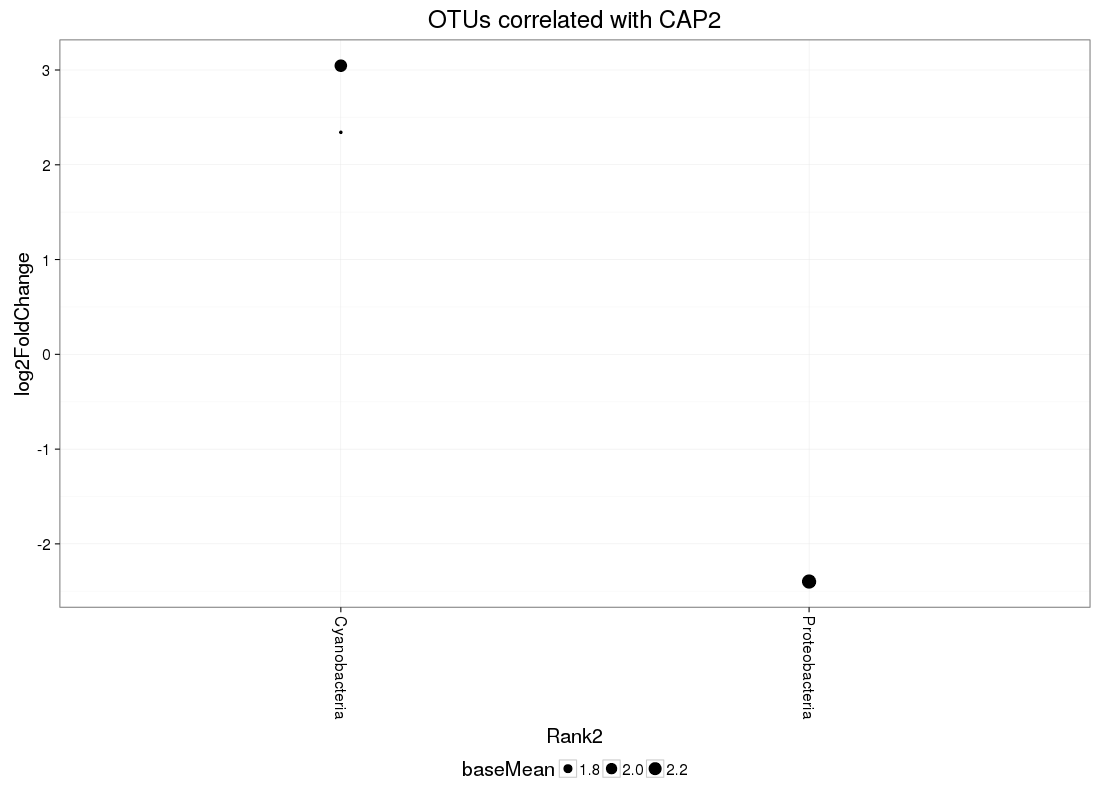

In [48]:
%%R -w 1100 -h 800
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank2, y=log2FoldChange, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("OTUs correlated with CAP2")  +
   theme(legend.position="bottom")
    x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
x
    p2

# Save results tables for use in other notebooks

In [27]:
%%R
head(DF)


Error in head(DF) : object 'DF' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in head(DF) : object 'DF' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [28]:
%%R
CAP = rbind(CAP1, CAP2)

CAP$direction = ifelse(CAP$log2FoldChange >= 0, "Pos", "Neg")

head(CAP)


Error in eval(expr, envir, enclos) : object 'CAP1' not found


In [29]:
%%R
write.table(CAP, file = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/CAP_responders.txt', sep = "\t")



Error in is.data.frame(x) : object 'CAP' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in is.data.frame(x) : object 'CAP' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


# Is constrained ordination correlated with enzymes?

In [30]:
%%R
temp = sample_data(phy.fit)
#rcorr(as.matrix(temp[,c("B", "Biomass_P", "DAP", "Plant_CN", "SeedSize_mg")]))
#rcorr(as.matrix(temp[,c("PC1", "PC2", "PC3", "BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g", "InorganicN")]))

rcorr(as.matrix(temp[,c("CAP1", "CAP2", "BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g", "InorganicN")]))


Error in sample_data(phy.fit) : object 'phy.fit' not found


In [31]:
%%R -w 800 -h 400
t2 = temp[,c("Plant", "Type", "PC1", "PC2", "PC3", "BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g", "InorganicN")]
p = t2 %>% 
    melt(id = c("Plant", "Type", "PC1", "PC2", "PC3")) %>%
         ggplot(aes(x = PC1, y = value)) +
        geom_point() +
        facet_wrap(~variable, ncol = 5, scales = "free_y") +
        stat_smooth(method = "lm")
p1 = t2 %>% 
    melt(id = c("Plant", "Type", "PC1", "PC2", "PC3")) %>%
         ggplot(aes(x = PC2, y = value)) +
        geom_point() +
        facet_wrap(~variable, ncol = 5, scales = "free_y") + 
        stat_smooth(method = "lm")
p2 = t2 %>% 
    melt(id = c("Plant", "Type", "PC1", "PC2", "PC3")) %>%
         ggplot(aes(x = PC3, y = value)) +
        geom_point() +
        facet_wrap(~variable, ncol = 5, scales = "free_y") + 
        stat_smooth(method = "lm")
grid.arrange(p, p1, p2, ncol = 1)


Error in withVisible({ : object 'temp' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : object 'temp' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


# Check is LAP directly correlated with similar OTUs

In [32]:
%%R
dds = phyloseq_to_deseq2(phy.fit, ~LAP_activity_g)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy.fit)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
DF$Test = "LAP"
LAP = DF




Error in sample_data(physeq, FALSE) : object 'phy.fit' not found


In [33]:
%%R -w 1100 -h 800
sigtab = LAP %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
# x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
# x = sort(x, TRUE)
# sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank2, y=log2FoldChange, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("Broad Shifts in Rhizosphere MCC Associated with Plant Growth Characteristics")  +
   theme(legend.position="bottom")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2


Error in eval(expr, envir, enclos) : object 'LAP' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'LAP' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [34]:
%%R
LAP.sig = LAP[LAP$padj < .05,]
levels(LAP.sig) = rev(levels(LAP.sig))
LAP.ns = LAP[LAP$padj >= .05,]

Plist = unique(LAP.sig$Rank2) %>% print
temp = filter(LAP, Rank2 %in% Plist)
temp = filter(temp, !is.na(Rank2) & Rank2 != "Candidate_division_BRC1" & Rank2 != "Elusimicrobia" & Rank2 != "Chlorobi" & Rank2 != "Cyanobacteria")
temp$Rank2 = droplevels(temp$Rank2)
levels(temp$Rank2) %>% unique()


Error in withVisible({ : object 'LAP' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : object 'LAP' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [35]:
%%R -w 800 -h 400



p = ggplot(temp)+
    geom_point(data = LAP.ns, aes(log2FoldChange, Rank2, size = baseMean,  position = "jitter"), color = "Gray",) +
    scale_shape_identity() +
    geom_point(data = LAP.sig, aes(log2FoldChange, Rank2,  size = baseMean, position = "jitter"),
               color = "orangered") +
    theme_bw(base_size = 28) +

    scale_y_discrete(limits = rev(levels(temp$Rank2))) +
    
    
               #geom_hline(y_intercept = .4) +
    
    #theme(axis.text.x = element_text(angle = 90)) +
    labs(x = "log[2] Fold Change along CAP2") +
    labs(y = "") + 
    theme(legend.position="right", legend.title = element_blank()) +
    theme(panel.border = element_blank()) +
    theme(panel.grid = element_blank()) +
     theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_blank())
           #axis.line.y = element_line(color="black", size = 1)) 

#p = p + scale_color_manual(values = getPalette(colourCount))
p


Error in ggplot(temp) : object 'temp' not found


In [36]:
%%R
LAP.sig = filter(LAP.sig, !is.na(padj))
LAP.sig


Error in filter_(.data, .dots = lazyeval::lazy_dots(...)) : 
  object 'LAP.sig' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in filter_(.data, .dots = lazyeval::lazy_dots(...)) : 
  object 'LAP.sig' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [37]:
## Are CB OTUs the same as Cap2

In [38]:
%%R
dds = phyloseq_to_deseq2(phy.fit, ~CB_activity_g)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy.fit)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
DF$Test = "CB"
CB = DF




Error in sample_data(physeq, FALSE) : object 'phy.fit' not found


In [39]:
%%R -w 1100 -h 800
sigtab = CB %>% filter(padj < 0.05)
CB.sig = filter(sigtab, log2FoldChange > 0)

x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
# x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
# x = sort(x, TRUE)
# sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank2, y=log2FoldChange, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("Broad Shifts in Rhizosphere MCC Associated with Plant Growth Characteristics")  +
   theme(legend.position="bottom")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2


Error in eval(expr, envir, enclos) : object 'CB' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'CB' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


### set tables dif

In [40]:
%%R
LAPCAP1 = inner_join(CAP1.sig, LAP.sig, by = "OTU")
LAPCAP1


Error in inner_join(CAP1.sig, LAP.sig, by = "OTU") : 
  object 'CAP1.sig' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in inner_join(CAP1.sig, LAP.sig, by = "OTU") : 
  object 'CAP1.sig' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [41]:
%%R
CAP2.sig = filter(CAP2, padj < 0.05 & log2FoldChange > 0)

CBCAP2 = inner_join(CAP2.sig, CB.sig, by = "OTU")
CBCAP2


Error in filter_(.data, .dots = lazyeval::lazy_dots(...)) : 
  object 'CAP2' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in filter_(.data, .dots = lazyeval::lazy_dots(...)) : 
  object 'CAP2' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


# Maize

In [123]:
%%R
phy = subset_samples(physeq.Full, Type == "Maize" & Treatment == "Nneg")

In [124]:
%%R
#add seed size
Plant = c("ERATE", "HELAN", "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")
SeedSize_mg = c(.0035, 90, 333, 38, .49, 10.7, 32.39,
               3.2, 1.58, 9.6, 1.8, 174, 264, 224, 219, 279, 207,
               240, 87, 222, 228, 231)
SS = cbind(Plant, SeedSize_mg) %>% as.data.frame
head(SS) %>% print
SS$SeedSize_mg = SS$SeedSize_mg %>% as.character %>% as.numeric



# # PCA of annuals
sd = as(sample_data(phy), "data.frame")
sd$Plant %>% levels %>% print
sd = left_join(sd, SS, by = "Plant")

rownames(sd) = sd$X.sample
rownames(sd)
sample_data(phy) = sd 

   Plant SeedSize_mg
1  ERATE      0.0035
2  HELAN          90
3    B73         333
4  FAGES          38
5  AMAPO        0.49
6 SORSUD        10.7
 [1] "75-062" "B73"    "B97"    "H99"    "Hp301"  "Il14H"  "Ki3"    "Mo18"  
 [9] "MS71"   "Oh7B"   "Tx303" 


In [125]:
%%R
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 44 samples ]
sample_data() Sample Data:       [ 44 samples by 56 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [126]:
%%R
registerDoParallel(cores=28)
maize.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [127]:
%%R
sample_data(phy)$SeedSize_mg

 [1] 222 222 264 333 333 264 264 264 222 207 240 231 207 219 207 222 240 231 207
[20] 231 333 333 240 219 219 240 231 219 228  87 228  87 279 224 279 224 224 279
[39] 228 279  87 228  87 224


[1] 72 79 88


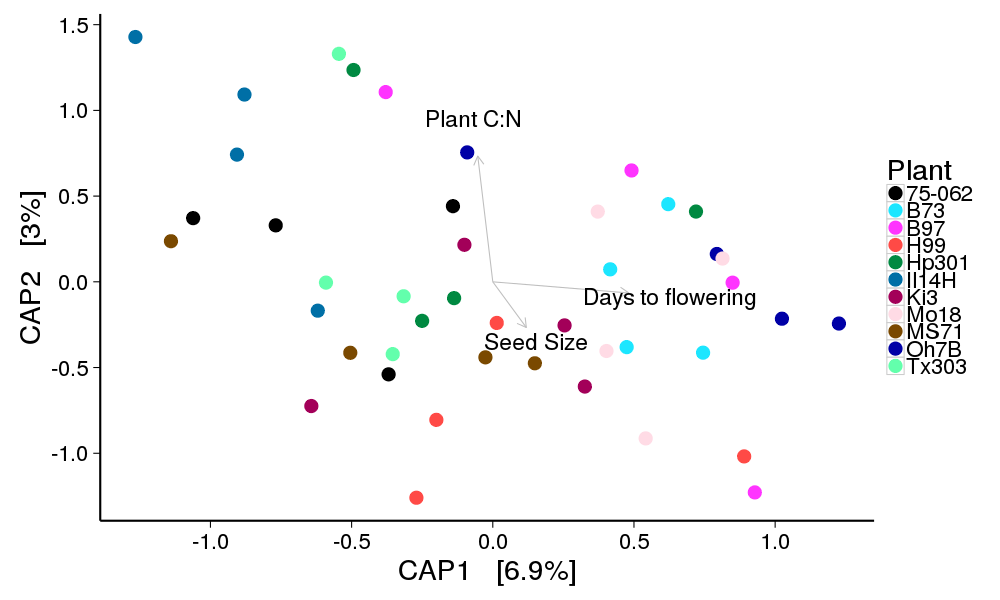

In [128]:
%%R -w 1000 -h 600

sample_data(phy)$DAP = sample_data(phy)$DAP %>% as.character() %>% as.numeric()
unique(sample_data(phy)$DAP) %>% print
# CAP ordinate
cap.ord = ordinate(
    physeq = phy, 
    method = "CAP",
    distance = maize.wunif.dist,
    formula = ~  M_Resid_logCN + DAP + SeedSize_mg + Condition(Library)
)

# CAP plot
cap.plot <- plot_ordination(
    phy, 
    cap.ord, 
    color = "Plant", 
    axes = c(1,2)
    ) + 
    #aes(shape = Type) + 
    geom_point(aes(colour = Plant), 
        alpha= 1, 
        size = 6) + 
    #geom_point(colour = "grey90", 
    #    size = 1.5) + 
    
    scale_color_manual(values = c("#000000", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) 
    
    #ggtitle("Plant Function")

# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap.ord, display = "bp")

rownames(arrowmat) = c("Plant C:N", "Days to flowering", "Seed Size")

# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
p = cap.plot + 
geom_segment(arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
    ) + 
geom_text(label_map, 
    size = 8,  
    data = arrowdf, 
    show_guide = FALSE) +
theme_bw(base_size = 28) +
    theme(legend.position="right") +
    theme(panel.border = element_blank()) +
    theme(panel.grid = element_blank())+
    theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1)) 
p

In [129]:
%%R
anova(cap.ord)

Permutation test for capscale under reduced model
Permutation: free
Number of permutations: 999

Model: capscale(formula = distance ~ M_Resid_logCN + DAP + SeedSize_mg + Condition(Library), data = data)
         Df SumOfSqs      F Pr(>F)  
Model     3  0.10173 1.6557  0.024 *
Residual 39  0.79871                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [130]:
%%R
# Check that rownames match
row.names(cap.plot$data)[1:5] %>% print
sample_data(phy) %>% row.names() %>% .[1:5]

[1] "sample5-1.22_Nneg" "sample5-2.29_Nneg" "sample5-2.06_Nneg"
[4] "sample6-2.26_Nneg" "sample6-3.18_Nneg"
[1] "sample5-1.22_Nneg" "sample5-2.29_Nneg" "sample5-2.06_Nneg"
[4] "sample6-2.26_Nneg" "sample6-3.18_Nneg"


In [131]:
%%R
sample_data(phy)$CAP1 = cap.plot$data$CAP1
sample_data(phy)$CAP2 = cap.plot$data$CAP2
head(sample_data(phy))

Sample Data:        [6 samples by 58 sample variables]:
                           X.sample Library Primer_Plate Primer_Well_ID
sample5-1.22_Nneg sample5-1.22_Nneg       1            1             A4
sample5-2.29_Nneg sample5-2.29_Nneg       1            1             C4
sample5-2.06_Nneg sample5-2.06_Nneg       1            2             C1
sample6-2.26_Nneg sample6-2.26_Nneg       1            2             C7
sample6-3.18_Nneg sample6-3.18_Nneg       1            2             E7
sample5-3.13_Nneg sample5-3.13_Nneg       1            2             E1
                  primerFR_ID_byPlate primerFR_ID_total barcode_ID    PlotID
sample5-1.22_Nneg                  25                25         25 1.22_Nneg
sample5-2.29_Nneg                  27                27         27 2.29_Nneg
sample5-2.06_Nneg                   3                99         99 2.06_Nneg
sample6-2.26_Nneg                  51               147        147 2.26_Nneg
sample6-3.18_Nneg                  53               149

In [133]:
%%R
dds = phyloseq_to_deseq2(phy, ~CAP1)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
DF$Test = "CB"
MaizeCAP1 = DF



[1] "Intercept" "CAP1"     


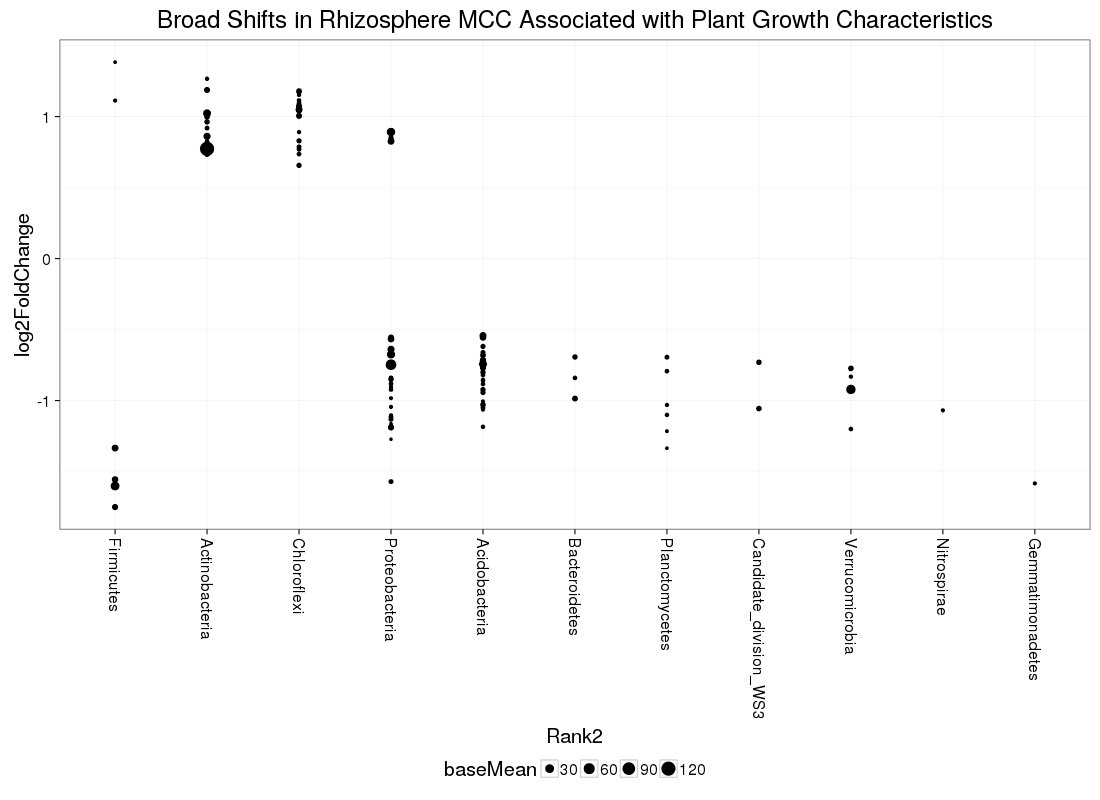

In [134]:
%%R -w 1100 -h 800
sigtab = MaizeCAP1 %>% filter(padj < 0.05)
#CB.sig = filter(sigtab, log2FoldChange > 0)

x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
# x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
# x = sort(x, TRUE)
# sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank2, y=log2FoldChange, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("Broad Shifts in Rhizosphere MCC Associated with Plant Growth Characteristics")  +
   theme(legend.position="bottom")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2

In [136]:
%%R
df.sig = MaizeCAP1[MaizeCAP1$padj < .05,]
levels(df.sig) = rev(levels(df.sig))
df.ns = MaizeCAP1[MaizeCAP1$padj >= .05,]

Plist = unique(df.sig$Rank2) %>% print
temp = filter(MaizeCAP1, Rank2 %in% Plist)
temp = filter(temp, !is.na(Rank2) & Rank2 != "Candidate_division_BRC1" & Rank2 != "Elusimicrobia" & Rank2 != "Chlorobi" & Rank2 != "Cyanobacteria")
temp$Rank2 = droplevels(temp$Rank2)
levels(temp$Rank2) %>% unique()

 [1] <NA>                   Chloroflexi            Acidobacteria         
 [4] Firmicutes             Gemmatimonadetes       Bacteroidetes         
 [7] Proteobacteria         Verrucomicrobia        Candidate_division_WS3
[10] Actinobacteria         Nitrospirae            Planctomycetes        
30 Levels: Acidobacteria Actinobacteria Armatimonadetes ... WCHB1-60
 [1] "Acidobacteria"          "Actinobacteria"         "Bacteroidetes"         
 [4] "Candidate_division_WS3" "Chloroflexi"            "Firmicutes"            
 [7] "Gemmatimonadetes"       "Nitrospirae"            "Planctomycetes"        
[10] "Proteobacteria"         "Verrucomicrobia"       


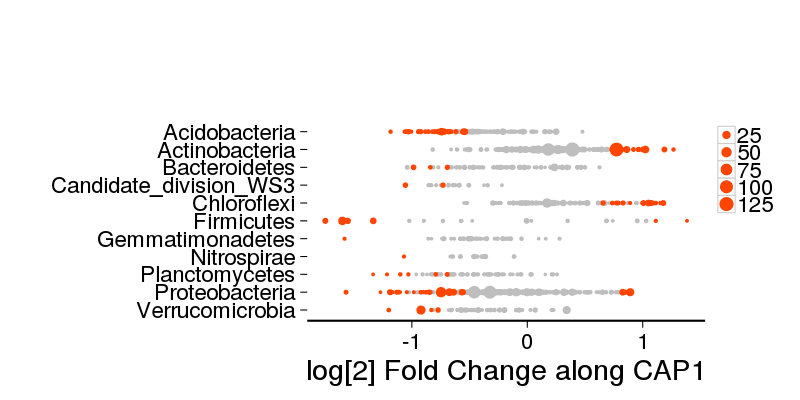

In [137]:
%%R -w 800 -h 400



p = ggplot(temp)+
    geom_point(data = df.ns, aes(log2FoldChange, Rank2, size = baseMean,  position = "jitter"), color = "Gray",) +
    scale_shape_identity() +
    geom_point(data = df.sig, aes(log2FoldChange, Rank2,  size = baseMean, position = "jitter"),
               color = "orangered") +
    theme_bw(base_size = 28) +

    scale_y_discrete(limits = rev(levels(temp$Rank2))) +
    
    
               #geom_hline(y_intercept = .4) +
    
    #theme(axis.text.x = element_text(angle = 90)) +
    labs(x = "log[2] Fold Change along CAP1") +
    labs(y = "") + 
    theme(legend.position="right", legend.title = element_blank()) +
    theme(panel.border = element_blank()) +
    theme(panel.grid = element_blank()) +
     theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_blank())
           #axis.line.y = element_line(color="black", size = 1)) 

#p = p + scale_color_manual(values = getPalette(colourCount))
p

In [53]:
%%R
MaizeCAP1 %>% filter(padj < 0.05 & log2FoldChange > 0)


Error in eval(expr, envir, enclos) : object 'MaizeCAP1' not found


In [54]:
%%R
dds = phyloseq_to_deseq2(phy, ~CAP2)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy.)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
DF$Test = "CAP2"
MaizeCAP2 = DF



[1] "Intercept" "CAP2"
Error in tax_table(phy.) : object 'phy.' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in tax_table(phy.) : object 'phy.' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [55]:
%%R -w 1100 -h 800
sigtab = MaizeCAP2 %>% filter(padj < 0.05)
#CB.sig = filter(sigtab, log2FoldChange > 0)

x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
# x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
# x = sort(x, TRUE)
# sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank2, y=log2FoldChange, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("Broad Shifts in Rhizosphere MCC Associated with Plant Growth Characteristics")  +
   theme(legend.position="bottom")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2


Error in eval(expr, envir, enclos) : object 'MaizeCAP2' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'MaizeCAP2' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [56]:
%%R
MaizeCAP2 %>% filter(padj < 0.05 & log2FoldChange < 0)


Error in eval(expr, envir, enclos) : object 'MaizeCAP2' not found


In [57]:
%%R
temp = sample_data(phy)
#rcorr(as.matrix(temp[,c("B", "Biomass_P", "DAP", "Plant_CN", "SeedSize_mg")]))
#rcorr(as.matrix(temp[,c("PC1", "PC2", "PC3", "BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g", "InorganicN")]))

rcorr(as.matrix(temp[,c("CAP1", "CAP2", "BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g", "InorganicN")]))

                CAP1  CAP2 BX_activity_g CB_activity_g LAP_activity_g
CAP1            1.00 -0.39          0.18          0.16           0.21
CAP2           -0.39  1.00         -0.11         -0.13          -0.04
BX_activity_g   0.18 -0.11          1.00          0.85           0.70
CB_activity_g   0.16 -0.13          0.85          1.00           0.54
LAP_activity_g  0.21 -0.04          0.70          0.54           1.00
NAG_activity_g  0.19  0.09          0.35          0.10           0.29
InorganicN     -0.07 -0.27         -0.21         -0.13          -0.23
               NAG_activity_g InorganicN
CAP1                     0.19      -0.07
CAP2                     0.09      -0.27
BX_activity_g            0.35      -0.21
CB_activity_g            0.10      -0.13
LAP_activity_g           0.29      -0.23
NAG_activity_g           1.00      -0.06
InorganicN              -0.06       1.00

n
               CAP1 CAP2 BX_activity_g CB_activity_g LAP_activity_g
CAP1             44   44            44   

# Annuals 

## Late Season Annuals - PCA of growth residuals

In [58]:
%%R
# PCA of annuals



# subset of plants for which functional variation was significant
LS = subset_samples(phy, Treatment == "Nneg" & Plant %in% c("B73",   "ERATE", 
 "ELCOR",  "SORSUD",    "SORBI", "HELAN") )


# Add seed size information
Plant = c("ERATE", "HELAN", "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")
                    
SeedSize_mg = c(.0035, 90, 333, 38, .49, 10.7, 32.39,
               3.2, 1.58, 9.6, 1.8, 174, .264, .224, 0.219, 0.279, 0.207,
               0.240, 0.0869, 0.222, 0.228, 0.231)


SS = cbind(Plant, SeedSize_mg) %>% as.data.frame
head(SS) %>% print
SS$SeedSize_mg = SS$SeedSize_mg %>% as.character %>% as.numeric


sd = as(sample_data(LS), "data.frame")

sd = left_join(sd, SS, by = "Plant")

sd$Plant %>% levels %>% print


fit = prcomp(~log(SeedSize_mg) + A_Resid_logB + A_Resid_logN + A_Resid_logCN, data = sd, 
                na.action = na.exclude, center = TRUE, scale = TRUE)

summary(fit) %>% print
fit$rotation %>% print
biplot(fit)





   Plant SeedSize_mg
1  ERATE      0.0035
2  HELAN          90
3    B73         333
4  FAGES          38
5  AMAPO        0.49
6 SORSUD        10.7
NULL
Error in model.frame.default(formula = ~log(SeedSize_mg) + A_Resid_logB +  : 
  variable lengths differ (found for 'A_Resid_logB')


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in model.frame.default(formula = ~log(SeedSize_mg) + A_Resid_logB +  : 
  variable lengths differ (found for 'A_Resid_logB')

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In as.matrix.data.frame(temp[, c("CAP1", "CAP2", "BX_activity_g",  :
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:  Setting class(x) to NULL;   result will no longer be an S4 object

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:  joining factor and character vector, coercing into character vector

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [59]:
%%R -w 600 -h 500
S = predict(fit)[,1:3]
TM_Fit = cbind(sd, S)
rownames(TM_Fit) = TM_Fit$X.sample
sample_data(LS) = TM_Fit



p = ggplot(TM_Fit, aes(PC1, PC2, colour = Plant, 
                       size = 12), pch = 21)
p = p + geom_point()
p = p + scale_colour_brewer(palette="Paired")
p = p + ggtitle("PCA of Late Season Plants: Seed size and residuals of Biomass, N uptake, C:N ratio")
p


Error in data.frame(..., check.names = FALSE) : 
  arguments imply differing number of rows: 4, 47


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in data.frame(..., check.names = FALSE) : 
  arguments imply differing number of rows: 4, 47

  res = super(Function, self).__call__(*new_args, **new_kwargs)


Notes: 
    * PC2 represents residual C:N ratio once plant size, total N uptake and seed size are controlled for
    * Species effect apparent in both PC1 and PC2

## Annuals CAP with growth residuals

In [60]:
%%R
# Calculate w-unifrac distances
registerDoParallel(cores=28)
LS.wunif.dist = phyloseq::distance(LS, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)


In [61]:
%%R -w 800 -h 600

dist = LS.wunif.dist

sample_data(LS)$DAP = as.factor(sample_data(LS)$DAP)
unique(sample_data(LS)$DAP) %>% print

#Weighted unifrac CAP

        # CAP ordinate
        cap.ord = ordinate(
            physeq = LS, 
            method = "CAP",
            distance = dist,
            formula = ~ log(SeedSize_mg) +  A_Resid_logN + A_Resid_logB + A_Resid_logCN + Condition(Library)

        )

        # CAP plot
        cap.plot <- plot_ordination(
            LS, 
            cap.ord, 
            color = "Plant", 
            axes = c(1,2)
            ) + 
            aes(shape = Type) + 
            geom_point(aes(colour = Plant), 
                alpha= 1, 
                size = 4) + 
            #geom_point(colour = "grey90", 
            #    size = 1.5) + 
            theme_bw(base_size = 16)
            #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", 
            #    "#1919ff", "darkorchid3", "magenta"))


        # Now add the environmental variables as arrows
        arrowmat <- vegan::scores(cap.ord, display = "bp")


        # Add labels, make a data.frame
        arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

        # Define the arrow aesthetic mapping
        arrow_map <- aes(xend = CAP1, 
            yend = CAP2, 
            x = 0, 
            y = 0, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        label_map <- aes(x = 1.3 * CAP1, 
            y = 1.3 * CAP2, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        arrowhead = arrow(length = unit(0.02, "npc"))

        # Make a new graphic
        p1 = cap.plot + 
            geom_segment(arrow_map, 
                size = .5, 
                data = arrowdf, 
                color = "gray", 
                arrow = arrowhead
                ) + 
            geom_text(label_map, 
                size = 4,  
                data = arrowdf, 
                show_guide = FALSE)

anova(cap.ord) %>% print
p1


[1] 79
Levels: 79
Error in Y.r[, oo, drop = FALSE] : subscript out of bounds


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in Y.r[, oo, drop = FALSE] : subscript out of bounds

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [62]:
%%R
# Check that rownames match
row.names(cap.plot$data)[1:5] %>% print
sample_data(LS) %>% row.names() %>% .[1:5]

[1] "sample5-1.22_Nneg" "sample5-2.29_Nneg" "sample5-2.06_Nneg"
[4] "sample6-2.26_Nneg" "sample6-3.18_Nneg"
[1] "sample6-2.26_Nneg" "sample6-3.18_Nneg" "sample6-4.30_Nneg"
[4] "sample6-1.12_Nneg" NA                 


In [63]:
%%R
sample_data(LS)$CAP1 = cap.plot$data$CAP1
#head(sample_data(phy))


Error in `$<-.data.frame`(S3Part(x, TRUE), name, value) : 
  replacement has 44 rows, data has 4


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in `$<-.data.frame`(S3Part(x, TRUE), name, value) : 
  replacement has 44 rows, data has 4

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## DeSEQ of CAP1

In [64]:
%%R
dds = phyloseq_to_deseq2(LS, ~Library + CAP1)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(LS)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)


Error in checkFullRank(modelMatrix) : 
  the model matrix is not full rank, so the model cannot be fit as specified.
  One or more variables or interaction terms in the design formula are linear
  combinations of the others and must be removed.

  Please read the vignette section 'Model matrix not full rank':

  vignette('DESeq2')


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: the design formula contains a numeric variable with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in checkFullRank(modelMatrix) : 
  the model matrix is not full rank, so the model cannot be fit as specified.
  One or more variables or interaction terms in the design formula are linear
  combinations of the others and must be removed.

  Please read the vignette section 'Model matrix not full rank':

  vignette('DESeq2')

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [65]:
%%R -w 1100 -h 800
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank3, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 20) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("Broad Shifts in Rhizosphere MCC Associated with Plant Growth Characteristics")  +
   theme(legend.position="bottom")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2


Error in UseMethod("filter_") : 
  no applicable method for 'filter_' applied to an object of class "c('DESeqResults', 'DataFrame', 'DataTable', 'SimpleList', 'DataTableORNULL', 'List', 'Vector', 'Annotated')"


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in UseMethod("filter_") : 
  no applicable method for 'filter_' applied to an object of class "c('DESeqResults', 'DataFrame', 'DataTable', 'SimpleList', 'DataTableORNULL', 'List', 'Vector', 'Annotated')"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


Notes:
* PC1 and PC2 describes 15.7% of variation in microbial community weighted unifrac distance
* CAP analysis is significant p < 0.001

## Try CAP with Enzyme info as well

In [66]:
%%R -w 800 -h 600

dist = LS.wunif.dist

sample_data(LS)$DAP = as.factor(sample_data(LS)$DAP)
unique(sample_data(LS)$DAP) %>% print

#Weighted unifrac CAP

        # CAP ordinate
        cap.ord = ordinate(
            physeq = LS, 
            method = "CAP",
            distance = dist,
            formula = ~ PC1 + PC2 + PC3 + Condition(Library)
        )

        # CAP plot
        cap.plot <- plot_ordination(
            LS, 
            cap.ord, 
            color = "LAP_activity_g", 
            axes = c(1,2)
            ) + 
            aes(shape = Type) + 
            geom_point(aes(fill = LAP_activity_g, size = CB_activity_g), 
                alpha= 1) + 
            #geom_point(colour = "grey90", 
            #    size = 1.5) + 
            theme_bw(base_size = 16)
            #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", 
            #    "#1919ff", "darkorchid3", "magenta"))


        # Now add the environmental variables as arrows
        arrowmat <- vegan::scores(cap.ord, display = "bp")


        # Add labels, make a data.frame
        arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

        # Define the arrow aesthetic mapping
        arrow_map <- aes(xend = CAP1, 
            yend = CAP2, 
            x = 0, 
            y = 0, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        label_map <- aes(x = 1.3 * CAP1, 
            y = 1.3 * CAP2, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        arrowhead = arrow(length = unit(0.02, "npc"))

        # Make a new graphic
        p1 = cap.plot + 
            geom_segment(arrow_map, 
                size = .5, 
                data = arrowdf, 
                color = "gray", 
                arrow = arrowhead
                ) + 
            geom_text(label_map, 
                size = 4,  
                data = arrowdf, 
                show_guide = FALSE)

anova(cap.ord) %>% print
p1

[1] 79
Levels: 79
Error in eval(expr, envir, enclos) : object 'PC1' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'PC1' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## How does unconstrained PCoA place these microbial communities

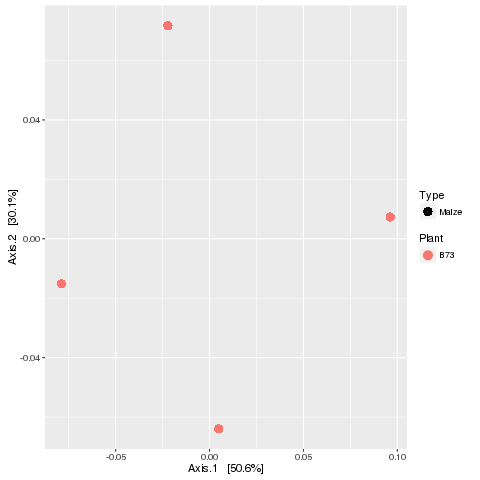

In [67]:
%%R
ordu = ordinate(LS, "PCoA", "unifrac", weighted=TRUE)
p = plot_ordination(LS, ordu, color="Plant", shape="Type") 
p = p + geom_point(size = 4)
p

##  Late Season Annuals Deseq of PC2
* Identify OTUs that vary with PC2

In [68]:
%%R
dds = phyloseq_to_deseq2(LS, ~Library + PC1)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(LS)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)


Error in DESeqDataSet(se, design = design, ignoreRank) : 
  all variables in design formula must be columns in colData


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in DESeqDataSet(se, design = design, ignoreRank) : 
  all variables in design formula must be columns in colData

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [69]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("OTUs correlated with PC1 \n in late season rhizosphere samples")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2


Error in UseMethod("filter_") : 
  no applicable method for 'filter_' applied to an object of class "c('DESeqResults', 'DataFrame', 'DataTable', 'SimpleList', 'DataTableORNULL', 'List', 'Vector', 'Annotated')"


In [70]:
%%R
cat(dim(sigtab)[1], "OTUs vary significantly with PC1")


Error in cat(dim(sigtab)[1], "OTUs vary significantly with PC1") : 
  object 'sigtab' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in cat(dim(sigtab)[1], "OTUs vary significantly with PC1") : 
  object 'sigtab' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [71]:
%%R
grid.arrange(p,p2, layout_matrix = rbind(c(1), c(2,2)))


Error in arrangeGrob(...) : object 'p2' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in arrangeGrob(...) : object 'p2' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## Late season Annuals - Deseq of Time /DAP

In [72]:
%%R
dds = phyloseq_to_deseq2(LS, ~Library + PC1 + DAP)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(LS)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)


Error in DESeqDataSet(se, design = design, ignoreRank) : 
  all variables in design formula must be columns in colData


In [73]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x


Error in UseMethod("filter_") : 
  no applicable method for 'filter_' applied to an object of class "c('DESeqResults', 'DataFrame', 'DataTable', 'SimpleList', 'DataTableORNULL', 'List', 'Vector', 'Annotated')"


In [74]:
%%R
cat(dim(sigtab)[1], "OTUs vary significantly with DAP")


Error in cat(dim(sigtab)[1], "OTUs vary significantly with DAP") : 
  object 'sigtab' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in cat(dim(sigtab)[1], "OTUs vary significantly with DAP") : 
  object 'sigtab' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## All Plants - CAP of functional traits

In [75]:
%%R
phy.neg = subset_samples(physeq.Full, Plant != "BARE"  & Treatment == "Nneg")
#sample_data(phy)$TimeClass = cut(sample_data(phy)$DAP, breaks = c(35,38, 62, 89), labels = c("A", "B", "C"))
#sample_data(phy)[,c("DAP", "TimeClass")]

   Plant SeedSize_mg
1  ERATE      0.0035
2  HELAN          90
3    B73         333
4  FAGES          38
5  AMAPO        0.49
6 SORSUD        10.7
 [1] "75-062" "ABUTH"  "AMAPO"  "B73"    "B97"    "ECHCG"  "ELCOR"  "ERATE" 
 [9] "FAGES"  "GLYMA"  "H99"    "HELAN"  "Hp301"  "Il14H"  "Ki3"    "Mo18"  
[17] "MS71"   "Oh7B"   "SETFA"  "SORBI"  "SORSUD" "Tx303" 
Importance of components:
                         PC1    PC2    PC3     PC4
Standard deviation     1.527 1.0247 0.7848 0.04564
Proportion of Variance 0.583 0.2625 0.1540 0.00052
Cumulative Proportion  0.583 0.8455 0.9995 1.00000
                        PC1        PC2        PC3          PC4
log(SeedSize_mg)  0.4375562 -0.3576541 -0.8249996 -0.001934066
A_Resid_logB      0.5769273 -0.3138561  0.4406140  0.611971036
A_Resid_logN      0.6312646  0.1535568  0.2699008 -0.710689000
A_Resid_logCN    -0.2778570 -0.8660244  0.2288852 -0.346999792


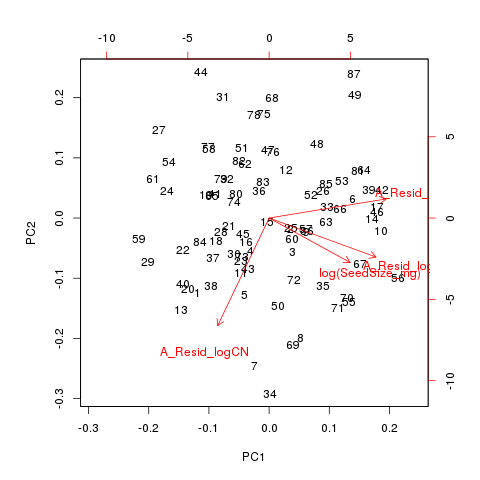

In [76]:
%%R
# PCA of all plants

# Add seed size information
Plant = c("ERATE", "HELAN", "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")
                    
SeedSize_mg = c(.0035, 90, 333, 38, .49, 10.7, 32.39,
               3.2, 1.58, 9.6, 1.8, 174, .264, .224, 0.219, 0.279, 0.207,
               0.240, 0.0869, 0.222, 0.228, 0.231)


SS = cbind(Plant, SeedSize_mg) %>% as.data.frame
head(SS) %>% print
SS$SeedSize_mg = SS$SeedSize_mg %>% as.character %>% as.numeric


sd = as(sample_data(phy.neg), "data.frame")

sd = left_join(sd, SS, by = "Plant")

sd$Plant %>% levels %>% print


fit = prcomp(~log(SeedSize_mg) + A_Resid_logB + A_Resid_logN + A_Resid_logCN, data = sd, 
                na.action = na.exclude, center = TRUE, scale = TRUE)

summary(fit) %>% print
fit$rotation %>% print
biplot(fit)





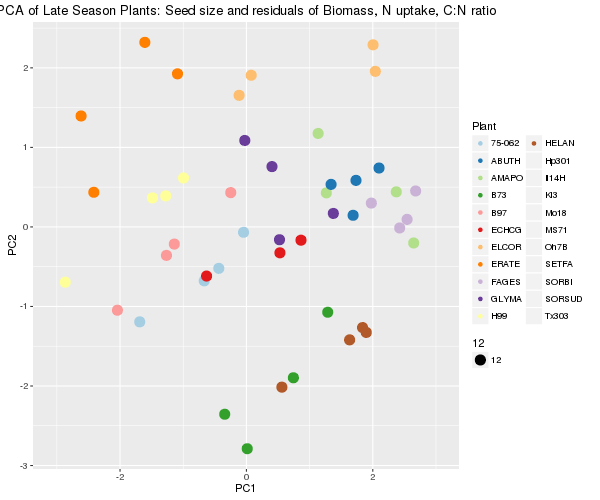

In [77]:
%%R -w 600 -h 500
S = predict(fit)[,1:3]
TM_Fit = cbind(sd, S)
rownames(TM_Fit) = TM_Fit$X.sample
sample_data(phy.neg) = TM_Fit



p = ggplot(TM_Fit, aes(PC1, PC2, colour = Plant, 
                       size = 12), pch = 21)
p = p + geom_point()
p = p + scale_colour_brewer(palette="Paired")
p = p + ggtitle("PCA of Late Season Plants: Seed size and residuals of Biomass, N uptake, C:N ratio")
p

In [78]:
%%R
# Calculate w-unifrac distances
registerDoParallel(cores=28)
wunif.dist = phyloseq::distance(phy.neg, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)


[1] 72 61 36 79 53 57 88 84
Levels: 36 53 57 61 72 79 84 88
Permutation test for capscale under reduced model
Permutation: free
Number of permutations: 999

Model: capscale(formula = distance ~ PC1 + PC2 + PC3 + Condition(Library), data = data)
         Df SumOfSqs      F Pr(>F)    
Model     3  0.29039 3.4357  0.001 ***
Residual 82  2.31025                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


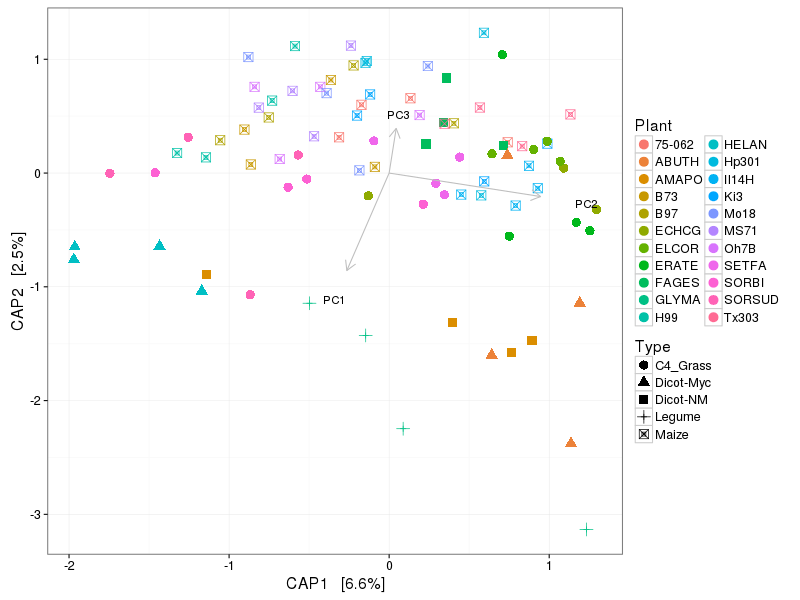

In [79]:
%%R -w 800 -h 600

dist = wunif.dist

sample_data(phy.neg)$DAP = as.factor(sample_data(phy.neg)$DAP)
unique(sample_data(phy.neg)$DAP) %>% print

#Weighted unifrac CAP

        # CAP ordinate
        cap.ord = ordinate(
            physeq = phy.neg, 
            method = "CAP",
            distance = dist,
            formula = ~ PC1 + PC2 + PC3 + Condition(Library)
        )

        # CAP plot
        cap.plot <- plot_ordination(
            phy.neg, 
            cap.ord, 
            color = "Plant", 
            axes = c(1,2)
            ) + 
            aes(shape = Type) + 
            geom_point(aes(colour = Plant), 
                alpha= 1, 
                size = 4) + 
            #geom_point(colour = "grey90", 
            #    size = 1.5) + 
            theme_bw(base_size = 16)
            #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", 
            #    "#1919ff", "darkorchid3", "magenta"))


        # Now add the environmental variables as arrows
        arrowmat <- vegan::scores(cap.ord, display = "bp")


        # Add labels, make a data.frame
        arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

        # Define the arrow aesthetic mapping
        arrow_map <- aes(xend = CAP1, 
            yend = CAP2, 
            x = 0, 
            y = 0, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        label_map <- aes(x = 1.3 * CAP1, 
            y = 1.3 * CAP2, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        arrowhead = arrow(length = unit(0.02, "npc"))

        # Make a new graphic
        p1 = cap.plot + 
            geom_segment(arrow_map, 
                size = .5, 
                data = arrowdf, 
                color = "gray", 
                arrow = arrowhead
                ) + 
            geom_text(label_map, 
                size = 4,  
                data = arrowdf, 
                show_guide = FALSE)

anova(cap.ord) %>% print
p1


## All plants - Deseq of Time 

In [110]:
%%R
sample_data(phy.neg)$DAP = sample_data(phy.neg)$DAP %>% as.character %>% as.numeric
dds = phyloseq_to_deseq2(phy.neg, ~ poly(DAP,2))
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy.neg)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: -- replacing outliers and refitting for 62 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

  res = super(Function, self).__call__(*new_args, **new_kwargs)


[1] "Intercept"     "poly.DAP..2.1" "poly.DAP..2.2"


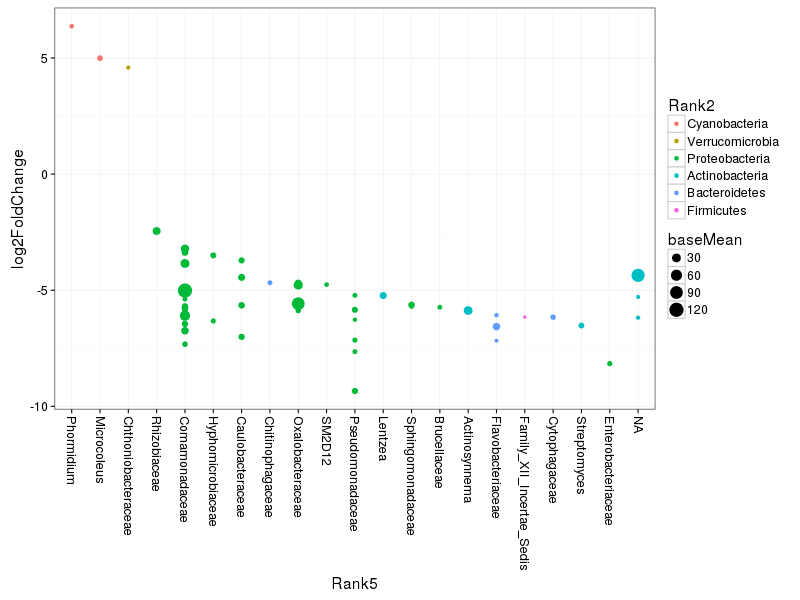

In [111]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
    #ggtitle("2nd order polynomial") +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [112]:
%%R

DF.C = results(d_dds, name = "poly.DAP..2.1")

supp = tax_table(physeq.Full)
            if (!setequal(row.names(supp), row.names(DF.C))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF.C), row.names(supp)))
        }  

        DF.C = data.frame(DF.C, supp)
        DF.C$OTU = rownames(DF.C)

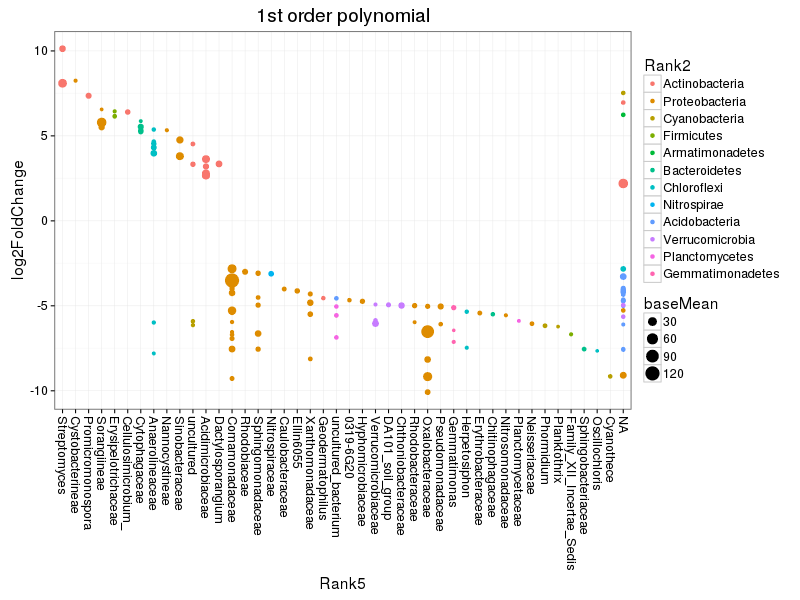

In [113]:
%%R -w 800 -h 600
sigtabC = DF.C %>% filter(padj < 0.05)
x = tapply(sigtabC$log2FoldChange, sigtabC$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtabC$Rank2 = factor(as.character(sigtabC$Rank2), levels=names(x))
x = tapply(sigtabC$log2FoldChange, sigtabC$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtabC$Rank5 = factor(as.character(sigtabC$Rank5), levels=names(x))
    
ggplot(sigtabC, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
    ggtitle("1st order polynomial")+
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x


In [114]:
%%R
head(DF)
colnames(DF) = paste(colnames(DF),".2", sep ="")
colnames(DF.C) = paste(colnames(DF.C),".1", sep ="")

In [115]:
%%R
L2F.DAP = full_join(DF.C, DF[,c(1:6, 15)], by = c("OTU.1" = "OTU.2"))
dim(L2F.DAP) %>% print
head(L2F.DAP)


[1] 4982   21
  baseMean.1 log2FoldChange.1  lfcSE.1      stat.1  pvalue.1 padj.1  Rank1.1
1 0.02319558      -0.21163674 1.190931 -0.17770695 0.8589531     NA Bacteria
2 0.08314549       0.43141023 1.428192  0.30206737 0.7626007     NA Bacteria
3 0.05009856      -0.04853471 1.190931 -0.04075358 0.9674923     NA Bacteria
4 0.00000000               NA       NA          NA        NA     NA Bacteria
5 0.06320591      -0.25611592 1.195226 -0.21428246 0.8303268     NA Bacteria
6 0.17867000      -0.31388001 1.848316 -0.16981948 0.8651521     NA Bacteria
        Rank2.1              Rank3.1                   Rank4.1 Rank5.1 Rank6.1
1           TM6 uncultured_bacterium                      <NA>    <NA>    <NA>
2           TM6 uncultured_bacterium                      <NA>    <NA>    <NA>
3 Acidobacteria                32-21      uncultured_bacterium    <NA>    <NA>
4 Elusimicrobia          Lineage_IIa      uncultured_bacterium    <NA>    <NA>
5 Elusimicrobia          Lineage_IIa uncultured_soil

In [116]:
%%R
sigtab = filter(L2F.DAP, padj.1 < 0.05 | padj.2 < 0.05)
cat(dim(sigtab)[1], "OTUs vary significantly with DAP")

164 OTUs vary significantly with DAP

In [87]:
%%R
head(sigtab)


Error in head(sigtab) : object 'sigtab' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in head(sigtab) : object 'sigtab' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [103]:
%%R
#all significant OTUs
AllSig = sigtab$OTU.1

#OTUs with significant 1st order polynomial positive log 2 fold
sigtab.1 = filter(sigtab, log2FoldChange.1 > 0) %>% arrange(padj.1)
dim(sigtab.1) %>% print
rownames(sigtab.1) = sigtab.1$OTU.1 
Top10.1 = sigtab.1[1:10, "OTU.1"] #%>% row.names
Top10.1 %>% print

sigtab.1neg = filter(sigtab, log2FoldChange.1 < 0) %>% arrange(padj.1)
dim(sigtab.1neg) %>% print
rownames(sigtab.1neg) = sigtab.1neg$OTU.1 
Top10.1neg = sigtab.1neg[1:10, "OTU.1"] #%>% row.names
Top10.1neg %>% print

sigtab.2 = filter(sigtab, padj.2 < 0.05) %>% arrange(padj.2)
dim(sigtab.2) %>% print
rownames(sigtab.2) = sigtab.2$OTU.2 
Top10.2 = sigtab.2[, "OTU.1"] #%>% row.names
Top10.2 %>% print


# sigtab.2neg = filter(sigtab, log2FoldChange.2 < 0) %>% arrange(padj.2)
# dim(sigtab.2neg) %>% print
# rownames(sigtab.2neg) = sigtab.2neg$OTU.2 
# Top10.2neg = sigtab.2neg[1:10, "OTU.1"] #%>% row.names
# Top10.2neg %>% print

# physub = prune_taxa(Top20, phy) %>%  merge_samples("DAP")
# physub



Error in eval(expr, envir, enclos) : object 'log2FoldChange.1' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'log2FoldChange.1' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [89]:
%%R
# create new deseq object with DAP as factor
phy = subset_samples(physeq.Full, Plant != "BARE")
phy = prune_taxa(AllSig, phy) %>% filter_taxa(function(x) max(x) > 100, TRUE)
phy


Error in prune_taxa(AllSig, phy) : object 'AllSig' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in prune_taxa(AllSig, phy) : object 'AllSig' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [90]:
%%R
# phy
sample_data(phy)$DAP = as.factor(sample_data(phy)$DAP)
dds = phyloseq_to_deseq2(phy, ~Library + DAP)
d_dds = DESeq(dds, parallel = TRUE)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: -- replacing outliers and refitting for 43 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: fitting model and testing

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [91]:
%%R
tax_table(phy) %>% row.names

   [1] "OTU.4087"  "OTU.2009"  "OTU.5899"  "OTU.4181"  "OTU.3052"  "OTU.1890" 
   [7] "OTU.5400"  "OTU.3083"  "OTU.2938"  "OTU.1285"  "OTU.3513"  "OTU.6694" 
  [13] "OTU.4682"  "OTU.2813"  "OTU.3814"  "OTU.2940"  "OTU.3474"  "OTU.10788"
  [19] "OTU.212"   "OTU.246"   "OTU.93"    "OTU.7289"  "OTU.1738"  "OTU.377"  
  [25] "OTU.1330"  "OTU.5010"  "OTU.2355"  "OTU.766"   "OTU.11000" "OTU.239"  
  [31] "OTU.9294"  "OTU.2373"  "OTU.717"   "OTU.3992"  "OTU.9096"  "OTU.11412"
  [37] "OTU.412"   "OTU.1513"  "OTU.12362" "OTU.3098"  "OTU.11864" "OTU.5917" 
  [43] "OTU.9254"  "OTU.3241"  "OTU.10352" "OTU.6676"  "OTU.28"    "OTU.10838"
  [49] "OTU.543"   "OTU.157"   "OTU.5575"  "OTU.10364" "OTU.1609"  "OTU.7219" 
  [55] "OTU.9012"  "OTU.3071"  "OTU.3945"  "OTU.945"   "OTU.2775"  "OTU.2379" 
  [61] "OTU.693"   "OTU.2903"  "OTU.2272"  "OTU.2522"  "OTU.1716"  "OTU.748"  
  [67] "OTU.1372"  "OTU.1712"  "OTU.8606"  "OTU.2624"  "OTU.2526"  "OTU.2065" 
  [73] "OTU.3159"  "OTU.3017"  "OTU.1582"  "OTU.1243

In [102]:
%%R -w 800 -h 1000
p <- list()
for (i in Top10.1neg){
  d = plotCounts(dds, gene=i, intgroup=c("DAP", "Type"), returnData = TRUE)  
p[[i]] = ggplot(d, aes(x=DAP, y=count, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
  theme(legend.position="none") +
    ggtitle(paste(i, "\n", Tinfo[i, 2], "\n", Tinfo[i, 6], sep = ""))
  }

#legend = get_legend(p[1])
do.call(grid.arrange,p)
#


Error in withVisible({ : object 'Top10.1neg' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : object 'Top10.1neg' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [ ]:
%%R -w 800 -h 1200
p <- list()
for (i in Top10.2){
  d = plotCounts(dds, gene=i, intgroup=c("DAP", "Type"), returnData = TRUE)  
p[[i]] = ggplot(d, aes(x=DAP, y=count, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
  theme(legend.position="none") +
    ggtitle(paste(i, "\n", Tinfo[i, 2], "\n", Tinfo[i, 6], sep = ""))
  }

#legend = get_legend(p[1])
do.call(grid.arrange,p)
#

In [ ]:
%%R
p <- list()
for (i in Top10.2neg){
  d = plotCounts(dds, gene=i, intgroup=c("DAP", "Type"), returnData = TRUE)  
p[[i]] = ggplot(d, aes(x=DAP, y=count, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
  theme(legend.position="none") +
    ggtitle(paste(i))
  }

#legend = get_legend(p[1])
do.call(grid.arrange,p)
#

In [ ]:
%%R
for (i in Top10.2){
p =  plotCounts(dds, gene=i, intgroup=c("DAP", "Plant"))  

}

In [ ]:
%%R -w 800 -h 400
library("scales")
d = plotCounts(dds, gene= "OTU.3", intgroup=c("DAP", "Plant"), returnData=TRUE)  
d = arrange(d, "DAP")
p = ggplot(d, aes(x = Plant, y = count)) + 
geom_point() +
scale_y_continuous(trans=log2_trans())

d = NULL
p 

In [ ]:
%%R
physeq.Full %>% tax_table %>% .[c("OTU.197", "OTU.101", "OTU.5", "OTU.271", "OTU.45", "OTU.10249", "OTU.3"), ]

In [ ]:
%%R
p = plot_bar(physub, "DAP", fill="Rank6")
p = p + facet_wrap(~OTU, ncol = 4, scales = "free_y")
p

In [ ]:
%%R
T = prune_taxa("OTU.1668", phy) %>% merge_samples("Plant")
p = plot_bar(T)
#p = p + facet_wrap(~OTU, ncol = 4, scales = "free_y")
p

## Paniceae - Deseq of Time 

In [117]:
%%R
phy = subset_samples(physeq.Full, Plant %in% c("ECHCG", "SETFA", "MS71", "Mo18", "SORBI", "SORSUD", "ERATE", "ELCOR") & Treatment == "Nneg")
#sample_data(phy)$TimeClass = cut(sample_data(phy)$DAP, breaks = c(35,38, 62, 89), labels = c("A", "B", "C"))
#sample_data(phy)[,c("DAP", "TimeClass")]

In [118]:
%%R

dds = phyloseq_to_deseq2(phy, ~Library +  DAP)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

[1] "Intercept" "Library"   "DAP"      


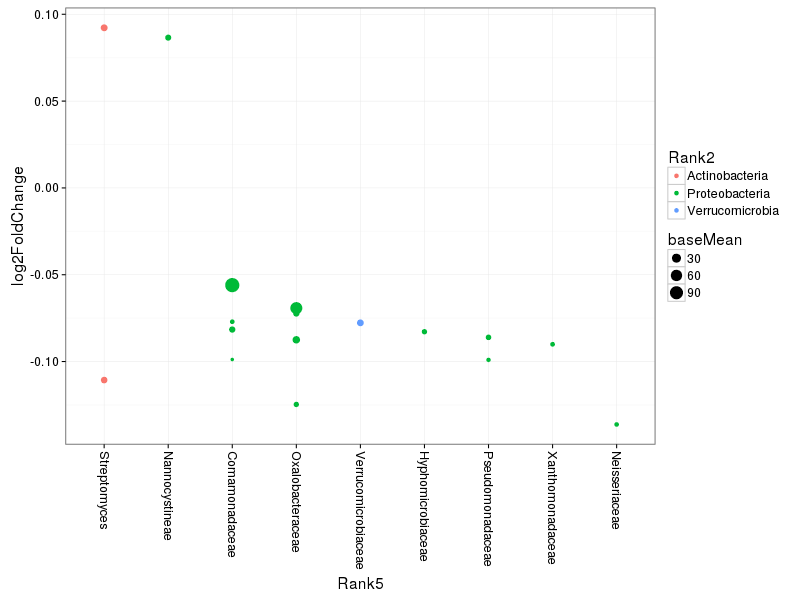

In [119]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
    #ggtitle("2nd order polynomial") +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [101]:
%%R
cat(dim(sigtab)[1], "OTUs vary significantly with DAP")

17 OTUs vary significantly with DAP

In [120]:
%%R
sigtab

      baseMean log2FoldChange      lfcSE      stat       pvalue         padj
1    4.6491110    -0.08603718 0.02157454 -3.987904 6.665954e-05 1.000499e-02
2    2.1568715    -0.09003044 0.02277234 -3.953499 7.701654e-05 1.059619e-02
3    1.8603177    -0.13620613 0.02449291 -5.561042 2.681686e-08 3.568717e-05
4    8.4899719    -0.07225913 0.02003082 -3.607398 3.092832e-04 3.639490e-02
5   15.6785091    -0.08744195 0.01733920 -5.043022 4.582374e-07 1.891375e-04
6    4.0415784    -0.12468650 0.02276498 -5.477118 4.323097e-08 3.568717e-05
7   71.5592382    -0.06922008 0.01340066 -5.165425 2.398937e-07 1.320215e-04
8    0.6515169    -0.09879460 0.02768031 -3.569129 3.581702e-04 3.695868e-02
9    7.8953353    -0.08154323 0.01708338 -4.773248 1.812779e-06 5.985798e-04
10   1.9651113    -0.07703003 0.02145676 -3.590012 3.306623e-04 3.639490e-02
11 112.5836184    -0.05597210 0.01363985 -4.103571 4.068215e-05 7.462915e-03
12   1.4378201    -0.09903964 0.02520518 -3.929338 8.518021e-05 1.081789e-02

In [ ]:
%%R

# DF.1 = results(d_dds, name = "poly.DAP..2.1")

# supp = tax_table(physeq.Full)
#             if (!setequal(row.names(supp), row.names(DF.1))) {
#             stop("Ordination and supplementary data indices differ on the following:\n.",
#             setdiff(row.names(DF.1), row.names(supp)))
#         }  

#         DF.1 = data.frame(DF.1, supp)
#         DF.1$OTU = rownames(DF.1)

In [ ]:
%%R -w 800 -h 600
# sigtab1 = DF.1 %>% filter(padj < 0.05)
# x = tapply(sigtab1$log2FoldChange, sigtab1$Rank2, function(x) max(x))
# x = sort(x, TRUE)
# sigtab1$Rank2 = factor(as.character(sigtab1$Rank2), levels=names(x))
# x = tapply(sigtab1$log2FoldChange, sigtab1$Rank5, function(x) max(x))
# x = sort(x, TRUE)
# sigtab1$Rank5 = factor(as.character(sigtab1$Rank5), levels=names(x))
    
# ggplot(sigtab1, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
#     geom_point() +
#     theme_bw(base_size = 16) +
#     ggtitle("1st order polynomial")+
#   theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
# #x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
# #x = sort(x, TRUE)
# #x


In [ ]:
%%R
head(DF)
colnames(DF) = paste(colnames(DF),".2", sep ="")
colnames(DF.1) = paste(colnames(DF.1),".1", sep ="")

In [ ]:
%%R
head(DF)

In [ ]:
%%R
# L2F.DAP = full_join(DF.1, DF[,c(1:6, 15)], by = c("OTU.1" = "OTU.2"))
# head(L2F.DAP)

In [ ]:
%%R
# sigtab = filter(L2F.DAP, padj.1 < 0.05 | padj.2 < 0.05)
cat(dim(sigtab)[1], "OTUs vary significantly with DAP")

In [ ]:
%%R
sigtab = arrange(sigtab, padj)
dim(sigtab) %>% print
#rownames(sigtab) = sigtab$OTU.1 
Top10.1 = sigtab[,"OTU"] 
Top10.1

# sigtab = arrange(sigtab, padj.2)
# dim(sigtab) %>% print
# rownames(sigtab) = sigtab$OTU.1 
# Top10.2 = sigtab[1:10,] %>% row.names
# Top10.2
# physub = prune_taxa(Top20, phy) %>%  merge_samples("DAP")
# physub


In [ ]:
%%R
# create new deseq object with DAP as factor
#phy = subset_samples(physeq.Full, Plant != "BARE")
sample_data(phy)$DAP = as.factor(sample_data(phy)$DAP)
dds = phyloseq_to_deseq2(phy, ~DAP)
d_dds = DESeq(dds, parallel = TRUE)

In [ ]:
%%R
for (i in Top10.1){
  plotCounts(dds, gene=i, intgroup=c("DAP", "Plant"))  

}

#

In [ ]:
%%R
for (i in Top10.2){
  plotCounts(dds, gene=i, intgroup=c("DAP", "Plant"))  

}

#

In [ ]:
%%R
colnames(DF)

In [ ]:
%%R
DF %>% filter(OTU.2 %in% c("OTU.4", "OTU.20"))

# Time without polynomial

In [93]:
%%R
phy.neg = subset_samples(phy, Plant != "BARE"  & Treatment == "Nneg" & Plant %in% c("ERATE", "HELAN", 
            "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA"))
#sample_data(phy)$TimeClass = cut(sample_data(phy)$DAP, breaks = c(35,38, 62, 89), labels = c("A", "B", "C"))
#sample_data(phy)[,c("DAP", "TimeClass")]
phy.neg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [94]:
%%R

dds = phyloseq_to_deseq2(phy.neg, ~DAP)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(phy.neg)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: -- replacing outliers and refitting for 53 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

  res = super(Function, self).__call__(*new_args, **new_kwargs)


[1] "Intercept" "DAP36"     "DAP53"     "DAP57"     "DAP61"     "DAP72"    
[7] "DAP79"     "DAP84"     "DAP88"    


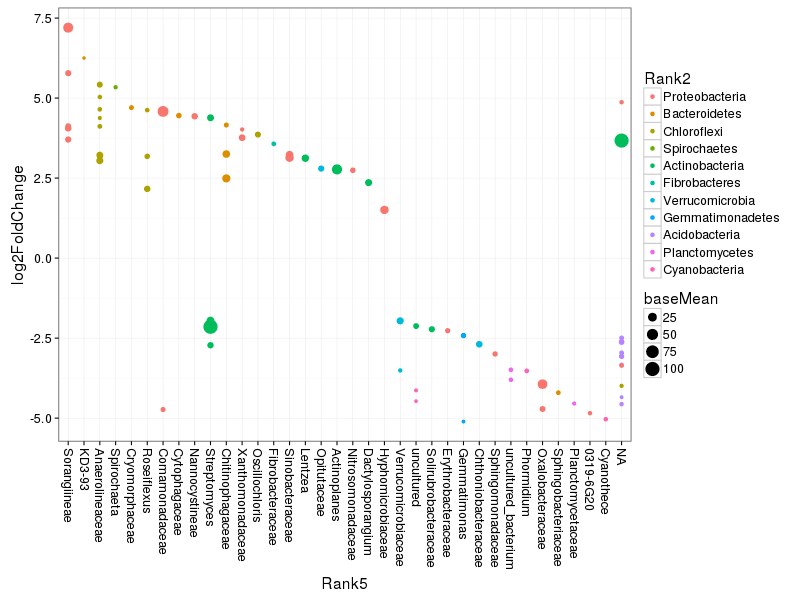

In [95]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
    #ggtitle("2nd order polynomial") +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [97]:
%%R
cat(dim(sigtab)[1], "OTUs vary significantly with DAP")

75 OTUs vary significantly with DAP

In [58]:
%%R
sigtab.1 =  arrange(sigtab, padj)
rownames(sigtab.1) = sigtab.1$OTU 
Sig = sigtab.1[, "OTU"] #%>% row.names
#Top20 %>% print

In [59]:
%%R
phy.p = filter_taxa(phy.neg, function(x) max(x) > 100, TRUE)
phy.p = prune_taxa(Sig, phy.p) 
phy.p

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 92 taxa and 55 samples ]
sample_data() Sample Data:       [ 55 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 92 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 92 tips and 91 internal nodes ]


In [60]:
%%R
# phy
sample_data(phy.p)$DAP = as.factor(sample_data(phy.p)$DAP)
dds = phyloseq_to_deseq2(phy.p, ~DAP)
d_dds = DESeq(dds, parallel = TRUE)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: -- replacing outliers and refitting for 1 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [61]:
%%R
tax_table(phy.p) %>% row.names

 [1] "OTU.284"   "OTU.307"   "OTU.277"   "OTU.681"   "OTU.202"   "OTU.161"  
 [7] "OTU.610"   "OTU.12453" "OTU.630"   "OTU.265"   "OTU.488"   "OTU.100"  
[13] "OTU.102"   "OTU.397"   "OTU.8671"  "OTU.378"   "OTU.188"   "OTU.57"   
[19] "OTU.414"   "OTU.10692" "OTU.141"   "OTU.261"   "OTU.120"   "OTU.2076" 
[25] "OTU.160"   "OTU.621"   "OTU.244"   "OTU.53"    "OTU.33"    "OTU.216"  
[31] "OTU.43"    "OTU.148"   "OTU.808"   "OTU.92"    "OTU.173"   "OTU.7529" 
[37] "OTU.1403"  "OTU.162"   "OTU.10249" "OTU.4"     "OTU.7778"  "OTU.208"  
[43] "OTU.5574"  "OTU.134"   "OTU.1998"  "OTU.11012" "OTU.11302" "OTU.74"   
[49] "OTU.10442" "OTU.5436"  "OTU.9501"  "OTU.10"    "OTU.641"   "OTU.5214" 
[55] "OTU.4040"  "OTU.101"   "OTU.45"    "OTU.23"    "OTU.152"   "OTU.10253"
[61] "OTU.114"   "OTU.49"    "OTU.4378"  "OTU.199"   "OTU.29"    "OTU.107"  
[67] "OTU.10375" "OTU.8916"  "OTU.329"   "OTU.183"   "OTU.25"    "OTU.189"  
[73] "OTU.117"   "OTU.200"   "OTU.516"   "OTU.41"    "OTU.197"   "OTU.63"   

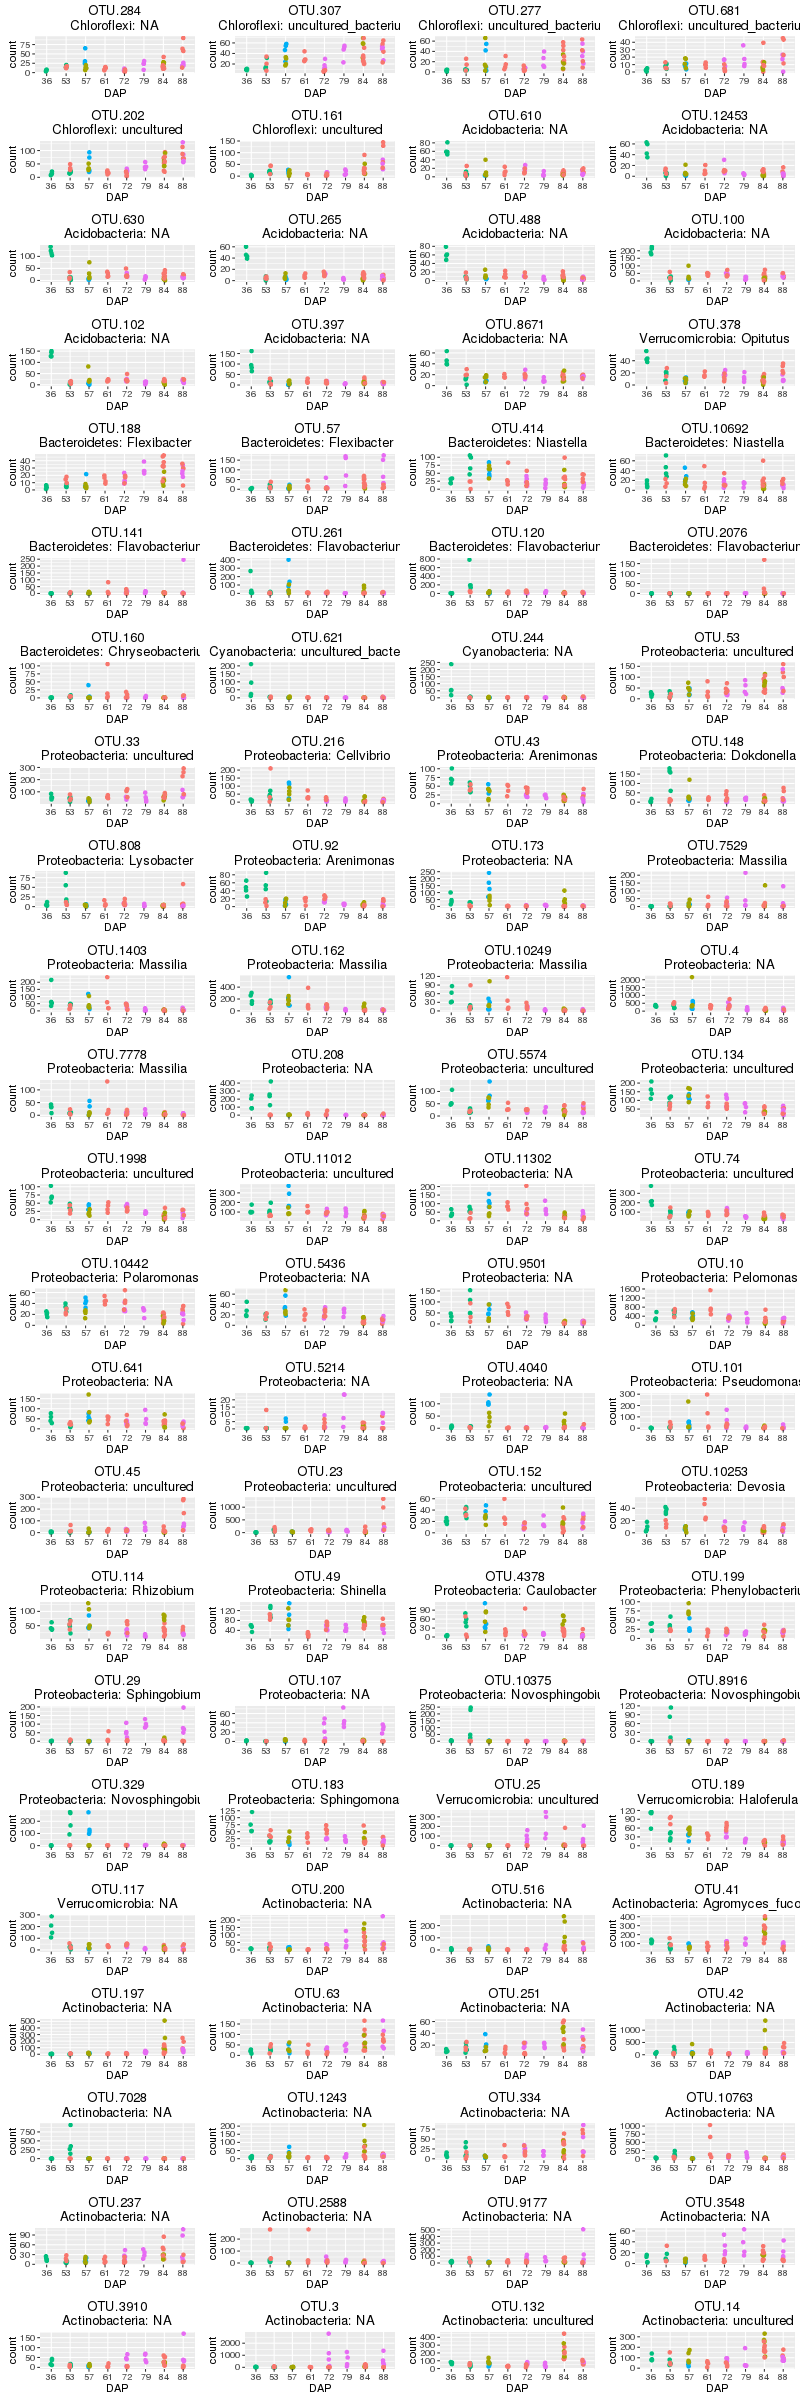

In [63]:
%%R -w 800 -h 2400
p <- list()
Tinfo = as(tax_table(phy.p), "matrix")
ToGraph = tax_table(phy.p) %>% row.names
for (i in ToGraph){
  d = plotCounts(dds, gene=i, intgroup=c("DAP", "Type"), returnData = TRUE)  
    
    
p[[i]] = ggplot(d, aes(x=DAP, y=count, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
  theme(legend.position="none") +
    ggtitle(paste(i, "\n", Tinfo[i, 2], ": ", Tinfo[i, 6], sep = ""))
  }

#legend = get_legend(p[1])
do.call(grid.arrange,c(p, ncol = 4))
#


# Maize

## Maize - PCA of functional traits 

In [ ]:
%%R
# PCA of annuals
M_neg = subset_samples(physeq.Full, Type == "Maize" & Treatment == "Nneg" )
# subset for later deSEQ2 analysis
M_neg_NR = subset_samples(physeq.NR, Type == "Maize" & Treatment == "Nneg" )

sd = as(sample_data(M_neg), "data.frame")
sd$Plant %>% levels %>% print

fit = prcomp(~M_Resid_logB + M_Resid_logN + M_Resid_logCN + d15N, data = sd, 
                na.action = na.exclude, center = TRUE, scale = TRUE)

summary(fit) %>% print
fit$rotation %>% print
biplot(fit)




In [ ]:
%%R -w 600 -h 500
S = predict(fit)[,1:3]
M_Fit = cbind(sd, S)
sample_data(M_neg) = M_Fit
sample_data(M_neg_NR) = M_Fit

p = ggplot(M_Fit, aes(PC1, PC2, colour = Plant, 
                       size = 12), pch = 21)
p = p + geom_point()
p = p + scale_colour_brewer(palette="Paired")
p = p + ggtitle("PCA of Maize: Biomass, N uptake, C:N ratio, 15N")
p

Notes:
* PC1 positively correlated with plant size and N uptake
* PC2 negatively correlated with plant C:N
* genotype effect is most captured on PC2

## Maize - CAP analysis with Principle components

In [ ]:
%%R
# Calculate w-unifrac distances
registerDoParallel(cores=28)
M_neg.wunif.dist = phyloseq::distance(M_neg, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

M_neg.unif.dist = phyloseq::distance(M_neg, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)



In [ ]:

%%R -w 800 -h 600
### Functional controls Maize, CAP
phy = M_neg
dist = M_neg.wunif.dist

sample_data(phy)$DAP = as.factor(sample_data(phy)$DAP)
unique(sample_data(phy)$DAP) %>% print

#Weighted unifrac CAP

        # CAP ordinate
        cap.ord = ordinate(
            physeq = phy, 
            method = "CAP",
            distance = dist,
            formula = ~ PC1 + PC2 + Condition(Library)
        )

        # CAP plot
        cap.plot <- plot_ordination(
            phy, 
            cap.ord, 
            color = "Plant", 
            axes = c(1,2)
            ) + 
            aes(shape = Type) + 
            geom_point(aes(colour = Plant), 
                alpha= 1, 
                size = 4) + 
            #geom_point(colour = "grey90", 
            #    size = 1.5) + 
            theme_bw(base_size = 16)
            #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", 
            #    "#1919ff", "darkorchid3", "magenta"))


        # Now add the environmental variables as arrows
        arrowmat <- vegan::scores(cap.ord, display = "bp")


        # Add labels, make a data.frame
        arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

        # Define the arrow aesthetic mapping
        arrow_map <- aes(xend = CAP1, 
            yend = CAP2, 
            x = 0, 
            y = 0, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        label_map <- aes(x = 1.3 * CAP1, 
            y = 1.3 * CAP2, 
            shape = NULL, 
            color = NULL, 
            label = labels)

        arrowhead = arrow(length = unit(0.02, "npc"))

        # Make a new graphic
        p = cap.plot + 
            geom_segment(arrow_map, 
                size = .5, 
                data = arrowdf, 
                color = "gray", 
                arrow = arrowhead
                ) + 
            geom_text(label_map, 
                size = 4,  
                data = arrowdf, 
                show_guide = FALSE)

anova(cap.ord) %>% print
p


CAP model is not significant

## Maize - Deseq of PC2

In [ ]:
%%R
dds = phyloseq_to_deseq2(M_neg_NR, ~Library + PC2)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(A_neg)
            if (!setequal(row.names(res), row.names(res))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

In [ ]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.1)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [ ]:
%%R
cat(dim(sigtab)[1], "OTUs vary significantly with PC2")

## Maize - Deseq of PC1

In [ ]:
%%R
dds = phyloseq_to_deseq2(M_neg_NR, ~Library + PC1)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds)

supp = tax_table(A_neg)
            if (!setequal(row.names(res), row.names(res))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

In [ ]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.1)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [ ]:
%%R
cat(dim(sigtab)[1], "OTUs vary significantly with PC1")

# sandbox

In [152]:
%%R
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [202]:
%%R
df.l2f = read.csv(log2foldFile, header = TRUE) 


In [203]:
%%R
head(df.l2f)

  log2FoldChange         p    Rank1          Rank2               Rank3
1     -1.2362293 0.9508456 Bacteria  Acidobacteria               32-21
2     -0.9586041 0.9990821 Bacteria  Acidobacteria          Holophagae
3      1.2753701 0.1881231 Bacteria  Acidobacteria          Holophagae
4     -0.9890428 0.9999999 Bacteria  Acidobacteria          Holophagae
5     -0.6773383 0.9649874 Bacteria  Acidobacteria          Holophagae
6     -1.7041008 0.9999051 Bacteria Proteobacteria Deltaproteobacteria
                 Rank4                Rank5      Rank6 Rank7 Rank8      OTU Day
1 uncultured_bacterium                 <NA>       <NA>  <NA>  <NA> OTU.5899  36
2              Sva0725                 <NA>       <NA>  <NA>  <NA> OTU.8680  36
3              Sva0725 uncultured_bacterium       <NA>  <NA>  <NA> OTU.2666  36
4              Sva0725                 <NA>       <NA>  <NA>  <NA>  OTU.323  36
5              Sva0725                 <NA>       <NA>  <NA>  <NA> OTU.7636  36
6    Desulfobacterales 

In [238]:
%%R
df.l2f %>% 
    filter(OTU %in% rownames(tax_table(pdms))) %>% 
    mutate(sig = ifelse(p.adj <0.05,"*",NA)) %>%
   select(OTU,log2FoldChange, p, p.adj, Day, Plant, sig) %>%
    arrange(Day, OTU)

          OTU log2FoldChange            p        p.adj Day  Plant  sig
1     OTU.101     2.02809830 1.554626e-02 1.479389e-01  36  FAGES <NA>
2   OTU.10294    -0.98420497 9.953341e-01 1.000000e+00  36  FAGES <NA>
3    OTU.1084    -1.13405602 9.022390e-01 1.000000e+00  36  FAGES <NA>
4    OTU.1242     5.73116385 7.730442e-07 3.035056e-05  36  FAGES    *
5    OTU.1899    -0.03905840 7.834656e-01 1.000000e+00  36  FAGES <NA>
6    OTU.2886    -0.09723327 6.880441e-01 1.000000e+00  36  FAGES <NA>
7    OTU.4280     0.52604399 4.872191e-01 1.000000e+00  36  FAGES <NA>
8     OTU.603     1.63401598 1.189260e-02 1.198071e-01  36  FAGES <NA>
9     OTU.101     2.54484734 4.311053e-03 5.296189e-02  53  AMAPO <NA>
10    OTU.101     4.70839792 1.647862e-05 4.642853e-04  53  ECHCG    *
11  OTU.10294     1.31968035 4.588990e-02 3.361753e-01  53  AMAPO <NA>
12  OTU.10294     2.15900379 4.398758e-03 5.381090e-02  53  ECHCG <NA>
13   OTU.1084     0.23276275 5.535191e-01 1.000000e+00  53  AMAPO <NA>
14   O

In [230]:
%%R
sig.df.l2f = df.l2f %>% 
    filter(OTU %in% rownames(tax_table(pdms))) %>% 
    filter(p.adj < 0.05) %>%
    mutate(sig = "*") %>%
   select(OTU,Day, Plant, sig)

In [231]:
%%R
sig.df.l2f

    log2FoldChange            p    Rank1          Rank2               Rank3
1      -0.98420497 9.953341e-01 Bacteria Proteobacteria Gammaproteobacteria
2       2.02809830 1.554626e-02 Bacteria Proteobacteria Gammaproteobacteria
3       0.52604399 4.872191e-01 Bacteria Proteobacteria Gammaproteobacteria
4      -0.03905840 7.834656e-01 Bacteria Proteobacteria Gammaproteobacteria
5       5.73116385 7.730442e-07 Bacteria Proteobacteria Gammaproteobacteria
6      -0.09723327 6.880441e-01 Bacteria Proteobacteria Gammaproteobacteria
7       1.63401598 1.189260e-02 Bacteria Proteobacteria Gammaproteobacteria
8      -1.13405602 9.022390e-01 Bacteria Proteobacteria Gammaproteobacteria
9       1.31968035 4.588990e-02 Bacteria Proteobacteria Gammaproteobacteria
10      2.54484734 4.311053e-03 Bacteria Proteobacteria Gammaproteobacteria
11      2.80487796 3.994331e-03 Bacteria Proteobacteria Gammaproteobacteria
12      2.09577892 7.098016e-03 Bacteria Proteobacteria Gammaproteobacteria
13      6.91

In [223]:
%%R
tax_table(pdms) 

Taxonomy Table:     [8 taxa by 8 taxonomic ranks]:
          Rank1      Rank2            Rank3                 Rank4            
OTU.1242  "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.10294 "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.4280  "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.101   "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.1899  "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.2886  "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.603   "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
OTU.1084  "Bacteria" "Proteobacteria" "Gammaproteobacteria" "Pseudomonadales"
          Rank5              Rank6         Rank7                    Rank8
OTU.1242  "Pseudomonadaceae" "Pseudomonas" NA                       NA   
OTU.10294 "Pseudomonadaceae" "Pseudomonas" "uncultured_bacterium"   NA   
OTU.4280  "Pseudomonadace

In [239]:
%%R
pdms = subset_taxa(physeq.Full, Rank6=="Pseudomonas") #%>%
          #  subset_samples(Treatment == "Nneg")


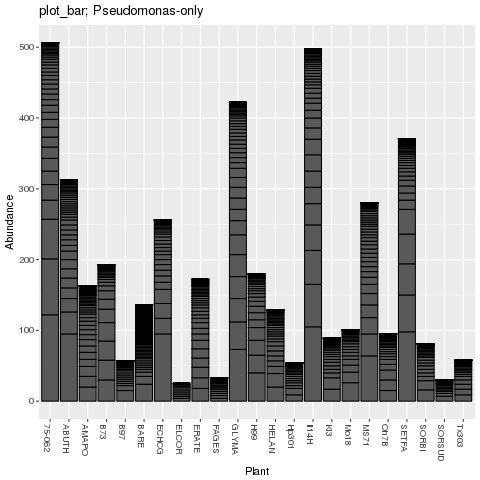

In [240]:
%%R
title = "plot_bar; Pseudomonas-only"
plot_bar(pdms, "Plant", "Abundance", title=title)

In [241]:
%%R
sample_sums(physeq.Full) %>% head

sample2-1.06_Npos sample6-4.27_Npos sample4-4.27_Nneg sample4-1.06_Nneg 
             4989              4989              4989              4989 
sample2-1.06_Nneg sample6-3.07_Nneg 
             4989              4989 


In [242]:
%%R
pdms.mean = psmelt(pdms) %>%
        group_by(OTU,DAP, Plant) %>%
         summarize(relAbundance = mean(Abundance)/4989) %>%
        left_join(.,sig.df.l2f)
#         group_by(DAP, Plant) %>%
#             summarize(abundance = sum(meanAbundance))


In [243]:
%%R
pdms.mean %>% arrange(DAP) %>% print(n = 230)

Source: local data frame [240 x 9]
Groups: OTU, DAP [64]

          OTU   DAP  Plant relAbundance log2FoldChange            p
        <chr> <int>  <chr>        <dbl>          <dbl>        <dbl>
1     OTU.101    36   BARE 5.011024e-05             NA           NA
2     OTU.101    36  FAGES 3.257166e-04     2.02809830 1.554626e-02
3   OTU.10294    36   BARE 1.002205e-04             NA           NA
4   OTU.10294    36  FAGES 0.000000e+00    -0.98420497 9.953341e-01
5    OTU.1084    36   BARE 0.000000e+00             NA           NA
6    OTU.1084    36  FAGES 0.000000e+00    -1.13405602 9.022390e-01
7    OTU.1242    36   BARE 0.000000e+00             NA           NA
8    OTU.1242    36  FAGES 2.505512e-04     5.73116385 7.730442e-07
9    OTU.1899    36   BARE 1.503307e-04             NA           NA
10   OTU.1899    36  FAGES 5.011024e-05    -0.03905840 7.834656e-01
11   OTU.2886    36   BARE 0.000000e+00             NA           NA
12   OTU.2886    36  FAGES 0.000000e+00    -0.09723327 6.8

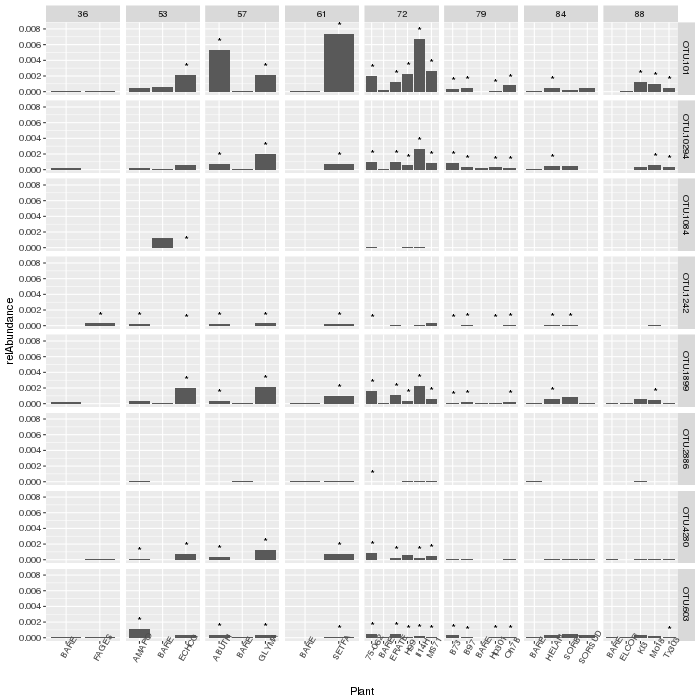

In [222]:
%%R -w 700 -h 700
ggplot(pdms.mean, aes(x = Plant, y = relAbundance)) +
    geom_bar(stat = "identity") + 
    facet_grid(OTU~DAP, scales = "free_x")+
    theme(axis.text.x = element_text(angle = 60))+
    geom_text(aes(y = relAbundance + .001, label=sig))
    